In [438]:
#import the warnings
import warnings
warnings.filterwarnings("ignore")

# Read Application csv

In [439]:
#import the liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_columns",None)

In [440]:
app_data = pd.read_csv("application_data.csv")
app_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

# Data Inspection On Application Dataset

# Get info and shape on the dataset

In [441]:
app_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 341.3+ KB


## Data Quality Check

## check for percentage null values in Application dataset

In [442]:
pd.set_option('display.max_rows',200)
app_data.isnull().mean()*100

SK_ID_CURR                       0.000000
TARGET                           0.000000
NAME_CONTRACT_TYPE               0.000000
CODE_GENDER                      0.000000
FLAG_OWN_CAR                     0.000000
FLAG_OWN_REALTY                  0.000000
CNT_CHILDREN                     0.000000
AMT_INCOME_TOTAL                 0.000000
AMT_CREDIT                       0.000000
AMT_ANNUITY                      0.000000
AMT_GOODS_PRICE                  0.000000
NAME_TYPE_SUITE                  0.279330
NAME_INCOME_TYPE                 0.000000
NAME_EDUCATION_TYPE              0.000000
NAME_FAMILY_STATUS               0.000000
NAME_HOUSING_TYPE                0.000000
REGION_POPULATION_RELATIVE       0.000000
DAYS_BIRTH                       0.000000
DAYS_EMPLOYED                    0.000000
DAYS_REGISTRATION                0.000000
DAYS_ID_PUBLISH                  0.000000
OWN_CAR_AGE                     70.949721
FLAG_MOBIL                       0.000000
FLAG_EMP_PHONE                   0

### - Conclusion: Columns with null values more than 43% may  give wrrong insights ,hence will drop them

#### Droping columns with missing values grater than 43%

In [443]:
percentage = 43
threshold = int(((100 - percentage) / 100) * app_data.shape[0] + 1)
how = 'any'  # Define how as 'any' or 'all' depending on your requirement

# Get boolean mask for columns with at least 'threshold' non-null values
col_mask = app_data.notna().sum(axis=0) >= threshold

# Apply the 'how' condition to the boolean mask
if how == 'any':
    col_mask = col_mask & app_data.notna().any(axis=0)
elif how == 'all':
    col_mask = col_mask & app_data.notna().all(axis=0)
else:
    raise ValueError("Invalid value for 'how'. Use 'any' or 'all'.")

# Filter the DataFrame using the boolean mask
app_df = app_data.loc[:, col_mask]

app_df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,NaN,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [444]:
app_df.shape

(358, 73)

In [445]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.279330
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

# Impute Missing Values

## Check the missing Values in application dataset before imputing

In [446]:
app_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   358 non-null    int64  
 1   TARGET                       358 non-null    int64  
 2   NAME_CONTRACT_TYPE           358 non-null    object 
 3   CODE_GENDER                  358 non-null    object 
 4   FLAG_OWN_CAR                 358 non-null    object 
 5   FLAG_OWN_REALTY              358 non-null    object 
 6   CNT_CHILDREN                 358 non-null    int64  
 7   AMT_INCOME_TOTAL             358 non-null    float64
 8   AMT_CREDIT                   358 non-null    float64
 9   AMT_ANNUITY                  358 non-null    float64
 10  AMT_GOODS_PRICE              358 non-null    float64
 11  NAME_TYPE_SUITE              357 non-null    object 
 12  NAME_INCOME_TYPE             358 non-null    object 
 13  NAME_EDUCATION_TYPE 

# OCCUPATION_TYPE column  has 26.81% missing values ,since its a categorrical column,imputing the missing valueswith a unknown or others value


In [447]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

26.81564245810056

In [448]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Laborers                 28.244275
Core staff               16.030534
Sales staff              15.648855
Drivers                  11.068702
Managers                  8.015267
High skill tech staff     4.198473
Medicine staff            3.053435
Accountants               2.290076
Cleaning staff            2.290076
Cooking staff             2.290076
Private service staff     1.526718
Security staff            1.526718
Low-skill Laborers        1.145038
Secretaries               1.145038
Waiters/barmen staff      0.763359
Realty agents             0.763359
Name: proportion, dtype: float64

In [449]:
app_df.OCCUPATION_TYPE.fillna("Others",inplace = True)

In [450]:
app_df.OCCUPATION_TYPE.isnull().mean()*100

0.0

In [451]:
app_df.OCCUPATION_TYPE.value_counts(normalize=True)*100

OCCUPATION_TYPE
Others                   26.815642
Laborers                 20.670391
Core staff               11.731844
Sales staff              11.452514
Drivers                   8.100559
Managers                  5.865922
High skill tech staff     3.072626
Medicine staff            2.234637
Cooking staff             1.675978
Cleaning staff            1.675978
Accountants               1.675978
Private service staff     1.117318
Security staff            1.117318
Low-skill Laborers        0.837989
Secretaries               0.837989
Waiters/barmen staff      0.558659
Realty agents             0.558659
Name: proportion, dtype: float64

#### EXT_source 23% missing values

In [452]:

app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.832785    1.433692
0.309275    1.075269
0.452534    1.075269
0.544235    1.075269
0.565608    1.075269
              ...   
0.232725    0.358423
0.812823    0.358423
0.156640    0.358423
0.161463    0.358423
0.223831    0.358423
Name: proportion, Length: 201, dtype: float64

In [453]:
app_df.EXT_SOURCE_3.describe()

count    279.000000
mean       0.506033
std        0.204054
min        0.051682
25%        0.347425
50%        0.524496
75%        0.687153
max        0.832785
Name: EXT_SOURCE_3, dtype: float64

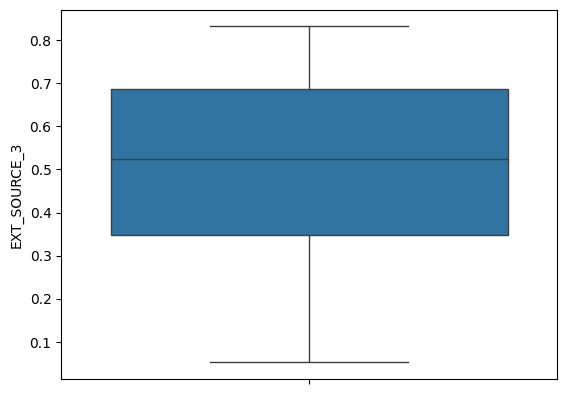

In [454]:
sns.boxplot(app_df.EXT_SOURCE_3)
plt.show()

- conclusion :Since a  numerical columns with no outliers and there is not much difference between Mean and Median .Hence we can compute with Mean or Meadian

In [455]:
app_df.EXT_SOURCE_3.fillna(app_df.EXT_SOURCE_3.median(), inplace = True)

In [456]:
app_df.EXT_SOURCE_3.isnull().mean()*100

0.0

In [457]:
app_df.EXT_SOURCE_3.value_counts(normalize=True)*100

EXT_SOURCE_3
0.524496    22.625698
0.832785     1.117318
0.565608     0.837989
0.452534     0.837989
0.309275     0.837989
              ...    
0.232725     0.279330
0.812823     0.279330
0.156640     0.279330
0.161463     0.279330
0.223831     0.279330
Name: proportion, Length: 201, dtype: float64

In [458]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

12

In [459]:
app_df.isnull().mean()*100

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.000000
AMT_GOODS_PRICE                 0.000000
NAME_TYPE_SUITE                 0.279330
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_REGISTRATION               0.000000
DAYS_ID_PUBLISH                 0.000000
FLAG_MOBIL                      0.000000
FLAG_EMP_PHONE                  0.000000
FLAG_WORK_PHONE                 0.000000
FLAG_CONT_MOBILE

 ### Handling Missing Values in Columns with 14% null values 

In [460]:
app_df.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_HOUR
0.0    98.697068
1.0     1.302932
Name: proportion, dtype: float64

In [461]:
app_df.AMT_REQ_CREDIT_BUREAU_DAY.value_counts(normalize=True)*100

AMT_REQ_CREDIT_BUREAU_DAY
0.0    99.348534
1.0     0.651466
Name: proportion, dtype: float64

- conclusion : we could see that 99% of values in the columns AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR is 0.0
Hence impute these columns with the mode

In [462]:
Cols =["AMT_REQ_CREDIT_BUREAU_HOUR","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_YEAR"]

In [463]:
for col in Cols:
    app_df[col].fillna(app_df[col].mode()[0],inplace = True)
    

In [464]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
FLAG_OWN_REALTY                0.000000
CNT_CHILDREN                   0.000000
AMT_INCOME_TOTAL               0.000000
AMT_CREDIT                     0.000000
AMT_ANNUITY                    0.000000
AMT_GOODS_PRICE                0.000000
NAME_TYPE_SUITE                0.279330
NAME_INCOME_TYPE               0.000000
NAME_EDUCATION_TYPE            0.000000
NAME_FAMILY_STATUS             0.000000
NAME_HOUSING_TYPE              0.000000
REGION_POPULATION_RELATIVE     0.000000
DAYS_BIRTH                     0.000000
DAYS_EMPLOYED                  0.000000
DAYS_REGISTRATION              0.000000
DAYS_ID_PUBLISH                0.000000
FLAG_MOBIL                     0.000000
FLAG_EMP_PHONE                 0.000000
FLAG_WORK_PHONE                0.000000
FLAG_CONT_MOBILE               0.000000


 ### Handling missing values less than 1%

In [465]:
null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

6

In [466]:
app_df.EXT_SOURCE_2.value_counts(normalize=True)*100  

EXT_SOURCE_2
0.265312    0.561798
0.646689    0.561798
0.262949    0.280899
0.195258    0.280899
0.523230    0.280899
              ...   
0.720640    0.280899
0.749241    0.280899
0.316755    0.280899
0.711289    0.280899
0.609781    0.280899
Name: proportion, Length: 354, dtype: float64

In [467]:
app_df.NAME_TYPE_SUITE.value_counts(normalize=True)*100  

NAME_TYPE_SUITE
Unaccompanied      80.672269
Family             12.605042
Spouse, partner     4.761905
Children            1.120448
Other_A             0.560224
Other_B             0.280112
Name: proportion, dtype: float64

In [468]:
app_df.OBS_30_CNT_SOCIAL_CIRCLE.value_counts(normalize=True)*100  

OBS_30_CNT_SOCIAL_CIRCLE
0.0     59.103641
1.0     14.565826
2.0      9.243697
3.0      4.761905
4.0      4.201681
6.0      2.521008
5.0      2.240896
10.0     1.120448
8.0      0.840336
9.0      0.560224
7.0      0.280112
12.0     0.280112
13.0     0.280112
Name: proportion, dtype: float64

- Conclusion :
         - For categorical Columns,impute the missing values with mode
         - For numerical Columns,imputing the missing values with median

In [469]:
app_df.NAME_TYPE_SUITE.fillna(app_df.NAME_TYPE_SUITE.mode()[0], inplace = True)

In [470]:
app_df.CNT_FAM_MEMBERS.fillna(app_df.CNT_FAM_MEMBERS.mode()[0], inplace = True)

In [471]:
# imputing  Numerical columns
app_df.EXT_SOURCE_2.fillna(app_df.EXT_SOURCE_2.median(), inplace = True)

app_df.OBS_30_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_30_CNT_SOCIAL_CIRCLE.median(), inplace = True)
app_df.DEF_30_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_30_CNT_SOCIAL_CIRCLE.median(), inplace = True)
app_df.OBS_60_CNT_SOCIAL_CIRCLE.fillna(app_df.OBS_60_CNT_SOCIAL_CIRCLE.median(), inplace = True)
app_df.DEF_60_CNT_SOCIAL_CIRCLE.fillna(app_df.DEF_60_CNT_SOCIAL_CIRCLE.median(), inplace = True)


In [472]:
 null_cols = list(app_df.columns[app_df.isna().any()])
len(null_cols)

0

In [473]:
app_df.isnull().mean()*100

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
FLAG_OWN_REALTY                0.0
CNT_CHILDREN                   0.0
AMT_INCOME_TOTAL               0.0
AMT_CREDIT                     0.0
AMT_ANNUITY                    0.0
AMT_GOODS_PRICE                0.0
NAME_TYPE_SUITE                0.0
NAME_INCOME_TYPE               0.0
NAME_EDUCATION_TYPE            0.0
NAME_FAMILY_STATUS             0.0
NAME_HOUSING_TYPE              0.0
REGION_POPULATION_RELATIVE     0.0
DAYS_BIRTH                     0.0
DAYS_EMPLOYED                  0.0
DAYS_REGISTRATION              0.0
DAYS_ID_PUBLISH                0.0
FLAG_MOBIL                     0.0
FLAG_EMP_PHONE                 0.0
FLAG_WORK_PHONE                0.0
FLAG_CONT_MOBILE               0.0
FLAG_PHONE                     0.0
FLAG_EMAIL                     0.0
OCCUPATION_TYPE                0.0
CNT_FAM_MEMBERS     

#### Convert Negative values to positive in days variables so that median is not affected

In [474]:
app_df.DAYS_BIRTH = app_df.DAYS_BIRTH.apply(lambda x : abs(x))
app_df.DAYS_EMPLOYED= app_df.DAYS_EMPLOYED.apply(lambda x : abs(x))
app_df.DAYS_ID_PUBLISH= app_df.DAYS_ID_PUBLISH.apply(lambda x : abs(x))
app_df.DAYS_REGISTRATION = app_df.DAYS_REGISTRATION.apply(lambda x : abs(x))
app_df.DAYS_LAST_PHONE_CHANGE = app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x : abs(x))

### Bining of continous variables  

#### standardizing Days columns in Years for  binning

In [475]:
app_df["YEARS_BIRTH"] = app_df.DAYS_BIRTH.apply(lambda x : int(x//356))
app_df["YEARS_EMPLOYED"] = app_df.DAYS_EMPLOYED.apply(lambda x : int(x//356))
app_df["YEARS_REGISTRATION"] = app_df.DAYS_REGISTRATION.apply(lambda x : int(x//356))
app_df["YEARS_ID_PUBLISH"] = app_df.DAYS_ID_PUBLISH.apply(lambda x : int(x//356))
app_df["YEARS_LAST_PHONE_CHANGE"] = app_df.DAYS_LAST_PHONE_CHANGE.apply(lambda x : int(x//356))
                                          
    

### Binning AMT_CREDIT Column

In [476]:
app_df.AMT_CREDIT.value_counts(normalize=True)*100

AMT_CREDIT
675000.0     5.027933
180000.0     3.631285
450000.0     2.793296
135000.0     2.513966
225000.0     1.955307
               ...   
260725.5     0.279330
539590.5     0.279330
182016.0     0.279330
254412.0     0.279330
1035832.5    0.279330
Name: proportion, Length: 218, dtype: float64

In [477]:
app_df.AMT_CREDIT.describe()

count    3.580000e+02
mean     5.946904e+05
std      4.010158e+05
min      5.212800e+04
25%      2.700000e+05
50%      5.153940e+05
75%      7.819200e+05
max      2.250000e+06
Name: AMT_CREDIT, dtype: float64

In [478]:
app_df["AMT_CREDIT_Category"] = pd.cut(app_df.AMT_CREDIT, [0,200000,400000,600000,800000,1000000],
                            labels = ["Very low Credit","Low Credit","Medium Credit","High Credit","Very High Credit"])

In [479]:
app_df.AMT_CREDIT_Category.value_counts(normalize = True)*100

AMT_CREDIT_Category
Medium Credit       28.239203
Low Credit          27.906977
High Credit         18.936877
Very low Credit     15.614618
Very High Credit     9.302326
Name: proportion, dtype: float64

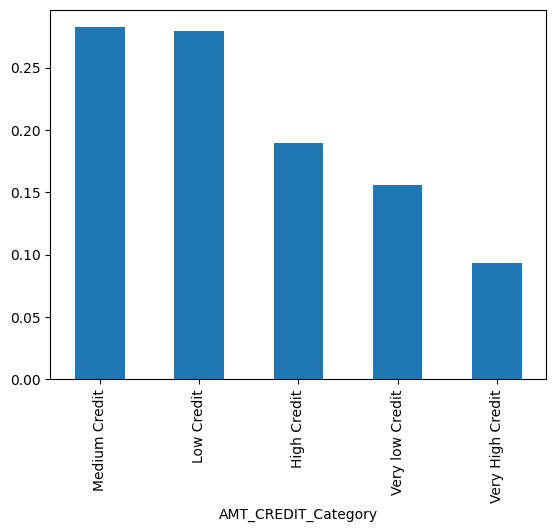

In [480]:
app_df["AMT_CREDIT_Category"].value_counts(normalize = True).plot.bar()
plt.show()

- Conclusion : The credit amount of the loan for amount low (2L to 4L) or Very High (above 8L)

### Binning YEARS_BIRTH Column

In [481]:
app_df["AGE_Category"]= pd.cut(app_df.YEARS_BIRTH,[0,25,45,65,85],
                               labels = ["Below 25","25 - 45","45 - 65","65 - 85"])

In [482]:
app_df.AGE_Category.value_counts(normalize = True)*100

AGE_Category
25 - 45     50.558659
45 - 65     40.502793
Below 25     4.748603
65 - 85      4.189944
Name: proportion, dtype: float64

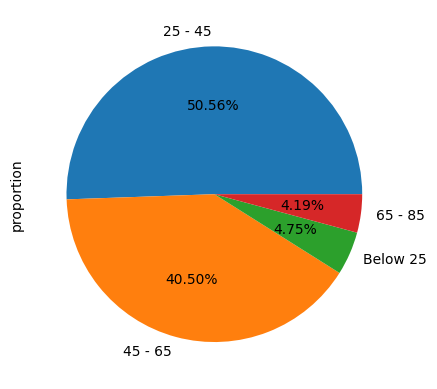

In [483]:
app_df["AGE_Category"].value_counts(normalize = True).plot.pie(autopct= '%1.2f%%')
plt.show()

- Conclusion : Most of the Applications are between 25 - 45 age group

## Data imbalance check

In [484]:
app_df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AMT_CREDIT_Category,AGE_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,1,10,5,3,Medium Credit,25 - 45
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.524496,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,47,3,3,0,2,NaN,45 - 65
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,0,11,7,2,Very low Credit,45 - 65
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.524496,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,8,27,6,1,Low Credit,45 - 65
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,19932,3038,4311.0,3458,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,Religion,0.322738,0.524496,0.0,0.0,0.0,0.0,1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,55,8,12,9,3,Medium Credit,45 - 65


## dividing Application Dataset with Target varaible as 0 and 1

In [485]:
tar_0 = app_df[app_df.TARGET==0]
tar_1 = app_df[app_df.TARGET==1]


In [486]:
app_df.TARGET.value_counts(normalize = True)*100

TARGET
0    93.575419
1     6.424581
Name: proportion, dtype: float64

- conclusion : 1 out of 9/10 applicants are defaults

## Univariate Analysis

In [487]:
cat_cols = list(app_df.columns[app_df.dtypes == object])
num_cols = list(app_df.columns[app_df.dtypes == np.int64]) + list(app_df.columns[app_df.dtypes == np.float64])


In [488]:
cat_cols

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'ORGANIZATION_TYPE']

In [489]:
num_cols

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL'

NAME_CONTRACT_TYPE
Cash loans         0.885475
Revolving loans    0.114525
Name: proportion, dtype: float64


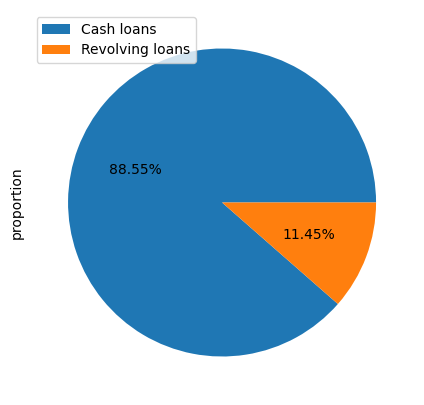

CODE_GENDER
F    0.614525
M    0.385475
Name: proportion, dtype: float64


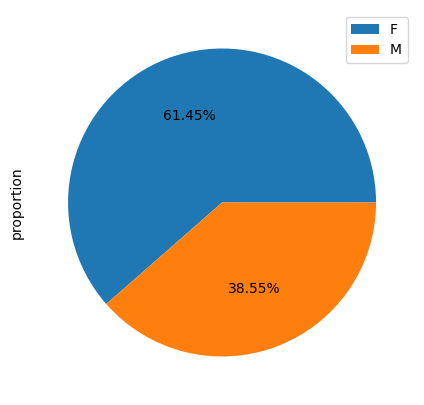

FLAG_OWN_CAR
N    0.709497
Y    0.290503
Name: proportion, dtype: float64


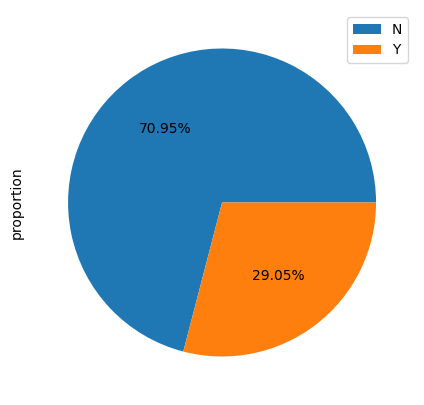

FLAG_OWN_REALTY
Y    0.695531
N    0.304469
Name: proportion, dtype: float64


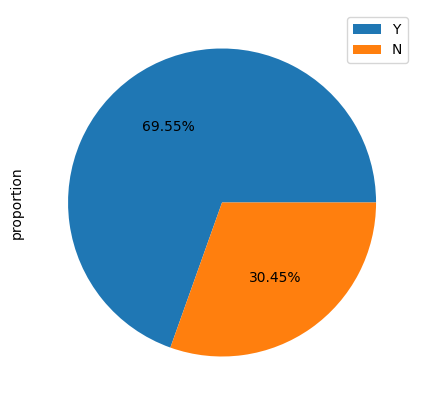

NAME_TYPE_SUITE
Unaccompanied      0.807263
Family             0.125698
Spouse, partner    0.047486
Children           0.011173
Other_A            0.005587
Other_B            0.002793
Name: proportion, dtype: float64


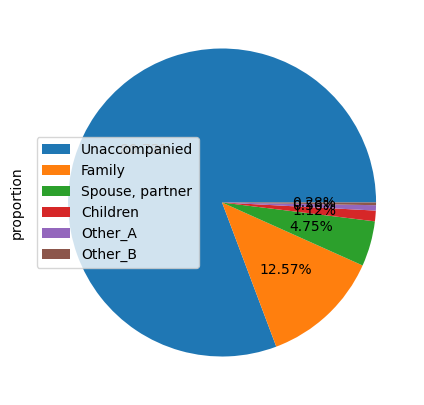

NAME_INCOME_TYPE
Working                 0.519553
Commercial associate    0.256983
Pensioner               0.159218
State servant           0.064246
Name: proportion, dtype: float64


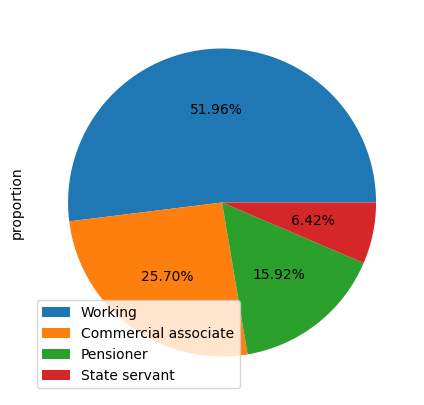

NAME_EDUCATION_TYPE
Secondary / secondary special    0.703911
Higher education                 0.259777
Incomplete higher                0.036313
Name: proportion, dtype: float64


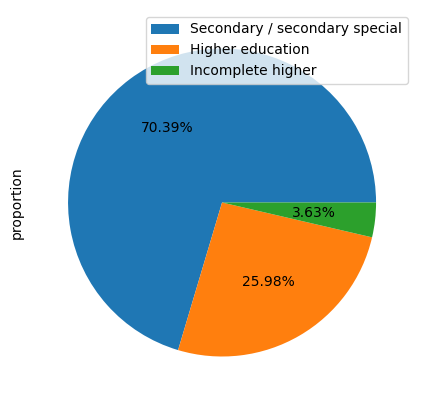

NAME_FAMILY_STATUS
Married                 0.603352
Single / not married    0.153631
Civil marriage          0.108939
Widow                   0.072626
Separated               0.061453
Name: proportion, dtype: float64


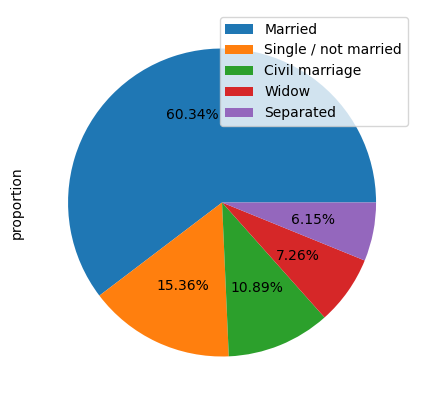

NAME_HOUSING_TYPE
House / apartment      0.896648
With parents           0.050279
Municipal apartment    0.033520
Rented apartment       0.013966
Office apartment       0.002793
Co-op apartment        0.002793
Name: proportion, dtype: float64


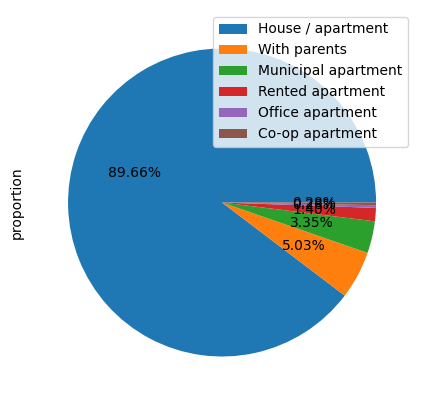

OCCUPATION_TYPE
Others                   0.268156
Laborers                 0.206704
Core staff               0.117318
Sales staff              0.114525
Drivers                  0.081006
Managers                 0.058659
High skill tech staff    0.030726
Medicine staff           0.022346
Cooking staff            0.016760
Cleaning staff           0.016760
Accountants              0.016760
Private service staff    0.011173
Security staff           0.011173
Low-skill Laborers       0.008380
Secretaries              0.008380
Waiters/barmen staff     0.005587
Realty agents            0.005587
Name: proportion, dtype: float64


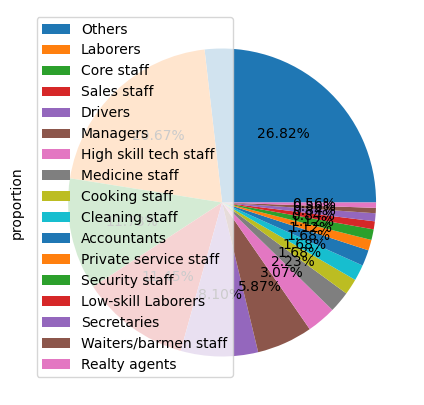

WEEKDAY_APPR_PROCESS_START
THURSDAY     0.178771
TUESDAY      0.178771
MONDAY       0.173184
FRIDAY       0.162011
WEDNESDAY    0.159218
SATURDAY     0.100559
SUNDAY       0.047486
Name: proportion, dtype: float64


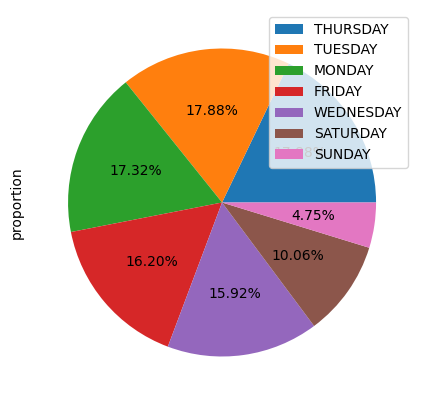

ORGANIZATION_TYPE
Business Entity Type 3    0.234637
XNA                       0.159218
Self-employed             0.134078
Government                0.044693
Other                     0.041899
Business Entity Type 2    0.036313
Medicine                  0.030726
Transport: type 4         0.027933
School                    0.025140
Industry: type 3          0.022346
Construction              0.022346
Trade: type 7             0.019553
Housing                   0.016760
Transport: type 2         0.013966
Kindergarten              0.011173
Industry: type 11         0.011173
Business Entity Type 1    0.011173
Police                    0.011173
Postal                    0.011173
Trade: type 3             0.011173
Bank                      0.011173
Trade: type 2             0.008380
Transport: type 3         0.008380
Military                  0.008380
Services                  0.008380
Hotel                     0.005587
Agriculture               0.005587
Restaurant                0.005587
In

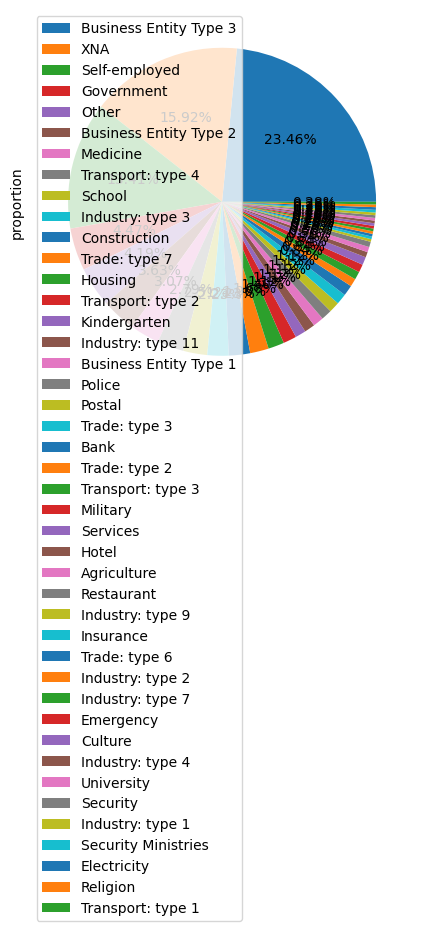

In [490]:
for col in cat_cols:
   print( app_df[col].value_counts(normalize = True))
   plt.figure(figsize=[5,5])
   app_df[col].value_counts(normalize = True).plot.pie(labeldistance = None,autopct= '%1.2f%%')
   plt.legend()
   plt.show()

-  Conclusion >> Insights on below columns

1. NAME_CONTRACT_TYPE - More application have Cash loans than Revolving loans

2. CODE_GENDER - Number of Female applicants are twice than that of male applicants

3 FLAG_OWN_CAR - Most(70%) of the applicants do not own a car

4. FLAG_OWN_REALTY - Most(70%) of the applicants do not own a house

5. NAME TYPE_SUITE - Most(81%) of the applicants are Unaccompanied

6. NAME INCOME TYPE-Most(51%) of the applicants are earning their income from Work

7. NAME EDUCATION_TYPE-71% of the applicants have completed Secondary / secondary special educatio

8. NAME FAMILY STATUS-60% of the applicants are married

9. NAME HOUSING TYPE-89% of the housing type of applicants are House/apartment

10 OCCUPATION TYPE-Most(31%) of the applicants have other Occupation type

11 WEEKDAY APPR PROCESS START-Most of the applicant have applied the loan on Tuseday

12. ORGANIZATION TYPE Most of the Organization type of employees are Business Entity Type 3

### PLot on Numerical columns
#### Categorizing columns with and without flags

In [491]:
num_cols_withoutflag = []
num_cols_withflag = []
for col in num_cols:
    if col.startswith("FLAG"):
        num_cols_withflag.append(col)
    else:
        num_cols_withoutflag.append(col)

In [492]:
num_cols_withflag

['FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 'FLAG_DOCUMENT_20',
 'FLAG_DOCUMENT_21']

In [493]:
num_cols_withoutflag

['SK_ID_CURR',
 'TARGET',
 'CNT_CHILDREN',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_ID_PUBLISH',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'HOUR_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'YEARS_BIRTH',
 'YEARS_EMPLOYED',
 'YEARS_REGISTRATION',
 'YEARS_ID_PUBLISH',
 'YEARS_LAST_PHONE_CHANGE',
 'AMT_INCOME_TOTAL',
 'AMT_CREDIT',
 'AMT_ANNUITY',
 'AMT_GOODS_PRICE',
 'REGION_POPULATION_RELATIVE',
 'DAYS_REGISTRATION',
 'CNT_FAM_MEMBERS',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'DAYS_LAST_PHONE_CHANGE',
 'AMT_REQ_CREDIT_BUREAU_HOUR',
 'AMT_REQ_CREDIT_BUREAU_DAY',
 'AMT_REQ_CREDIT_BUREAU_WEEK',
 'AMT_REQ_CREDIT_BUREAU_MON',
 'AMT_REQ_CREDIT_BUREAU_QRT',
 'AMT_REQ_CREDIT_BUREAU_YEAR']

count       358.000000
mean     100207.089385
std         118.603418
min      100002.000000
25%      100104.250000
50%      100207.500000
75%      100308.750000
max      100411.000000
Name: SK_ID_CURR, dtype: float64


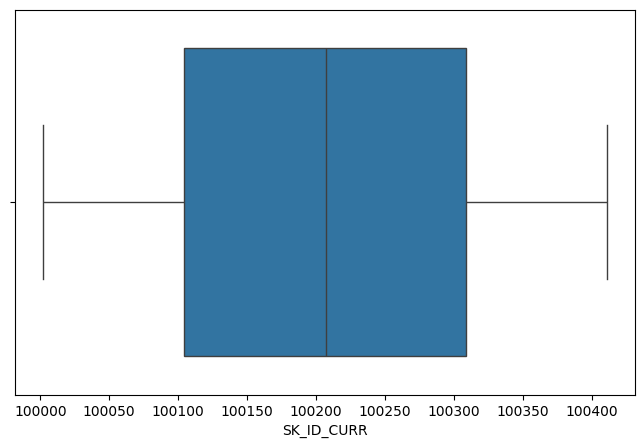

-----------------
count    358.000000
mean       0.064246
std        0.245533
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: TARGET, dtype: float64


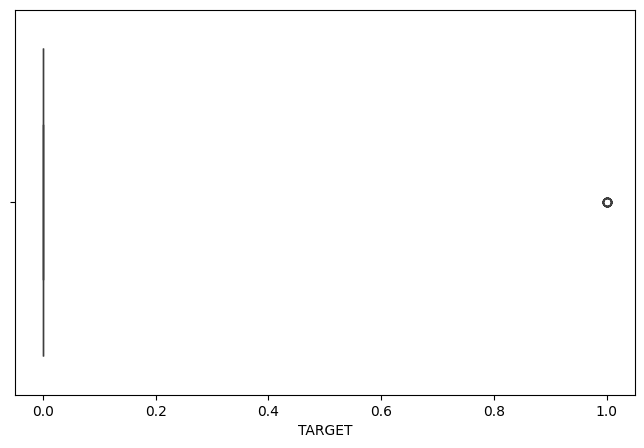

-----------------
count    358.000000
mean       0.393855
std        0.701073
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: CNT_CHILDREN, dtype: float64


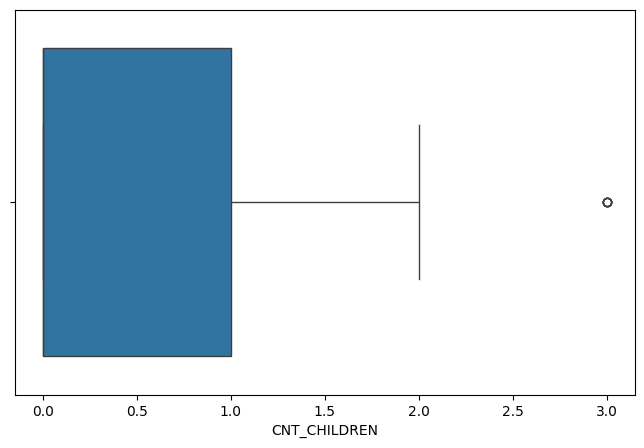

-----------------
count      358.000000
mean     16020.553073
std       4399.481168
min       7907.000000
25%      12241.500000
50%      15696.500000
75%      19644.500000
max      25104.000000
Name: DAYS_BIRTH, dtype: float64


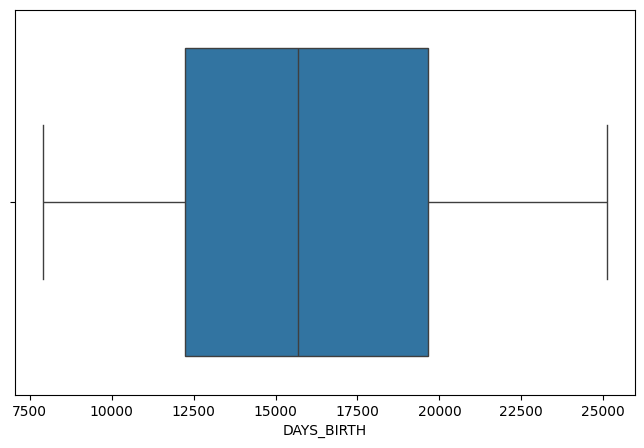

-----------------
count       358.000000
mean      60172.670391
std      132959.499583
min          17.000000
25%         870.500000
50%        2201.000000
75%        5227.500000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


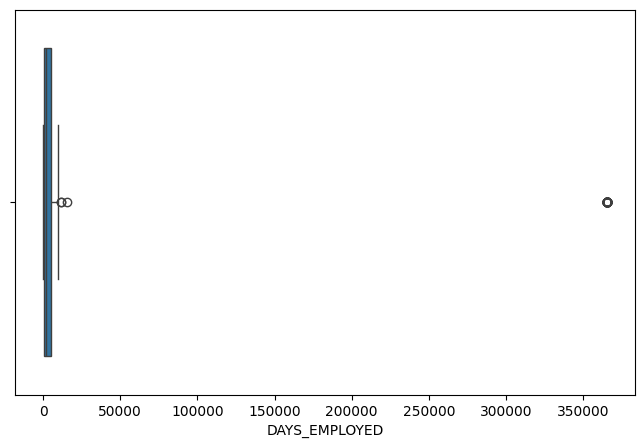

-----------------
count     358.000000
mean     2963.402235
std      1496.351962
min         1.000000
25%      1797.750000
50%      3197.500000
75%      4262.750000
max      5942.000000
Name: DAYS_ID_PUBLISH, dtype: float64


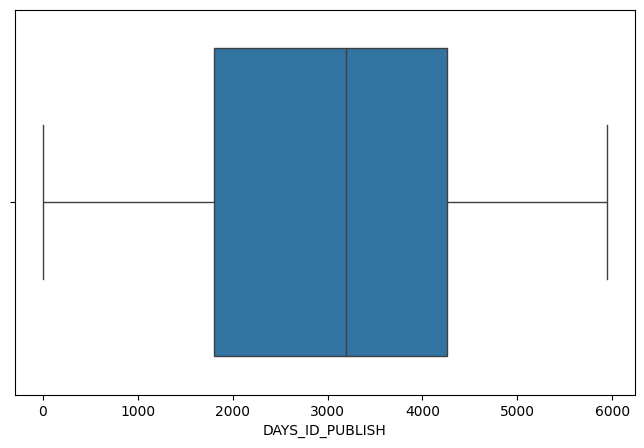

-----------------
count    358.000000
mean       2.053073
std        0.490788
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: REGION_RATING_CLIENT, dtype: float64


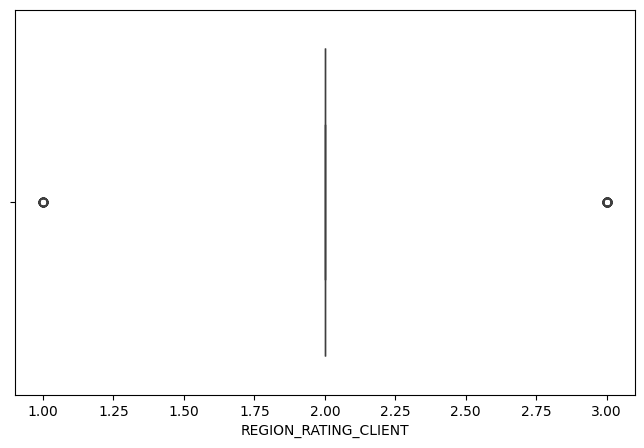

-----------------
count    358.000000
mean       2.016760
std        0.484781
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        3.000000
Name: REGION_RATING_CLIENT_W_CITY, dtype: float64


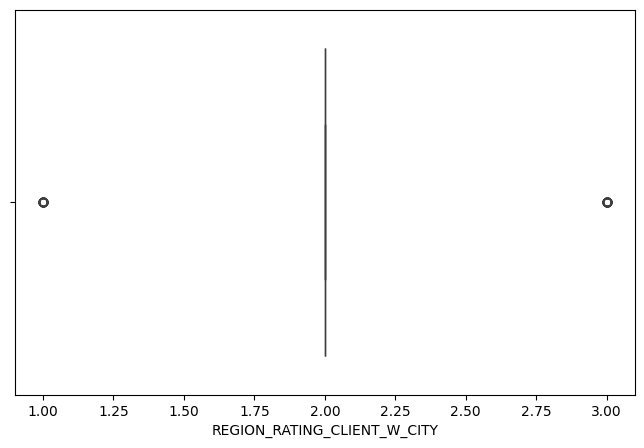

-----------------
count    358.000000
mean      11.843575
std        3.227699
min        3.000000
25%       10.000000
50%       11.500000
75%       14.000000
max       21.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


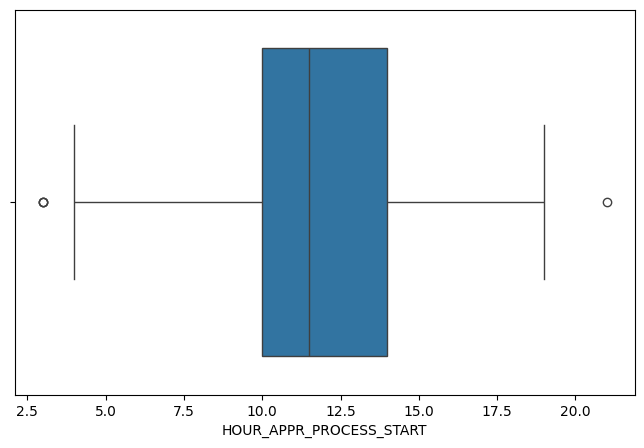

-----------------
count    358.000000
mean       0.019553
std        0.138652
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: REG_REGION_NOT_LIVE_REGION, dtype: float64


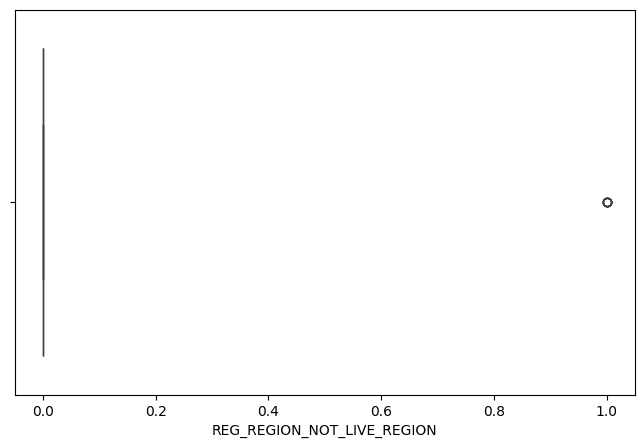

-----------------
count    358.000000
mean       0.072626
std        0.259884
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: REG_REGION_NOT_WORK_REGION, dtype: float64


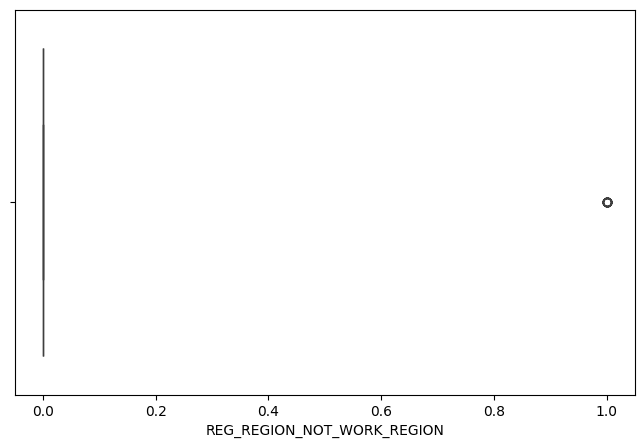

-----------------
count    358.000000
mean       0.061453
std        0.240495
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: LIVE_REGION_NOT_WORK_REGION, dtype: float64


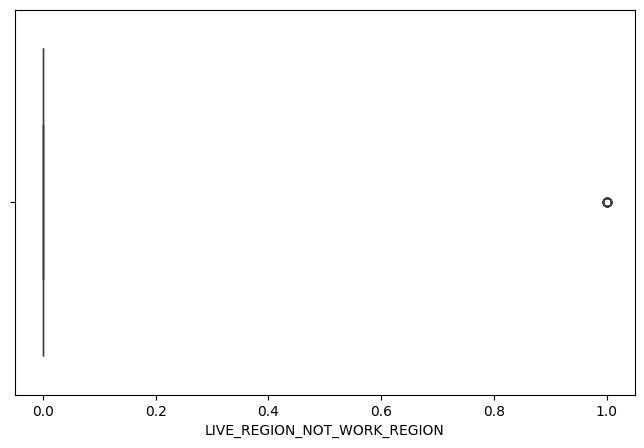

-----------------
count    358.000000
mean       0.061453
std        0.240495
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: REG_CITY_NOT_LIVE_CITY, dtype: float64


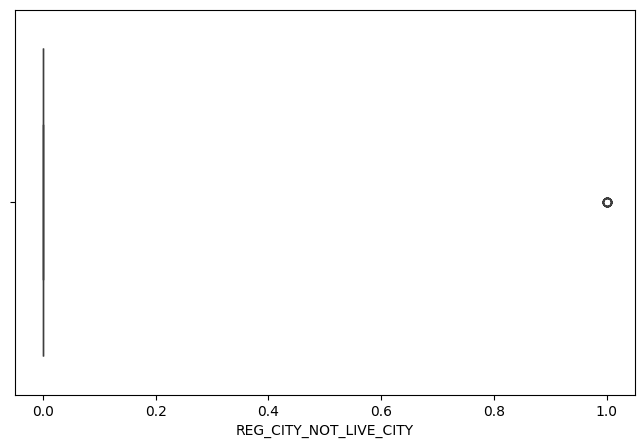

-----------------
count    358.000000
mean       0.248603
std        0.432808
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: REG_CITY_NOT_WORK_CITY, dtype: float64


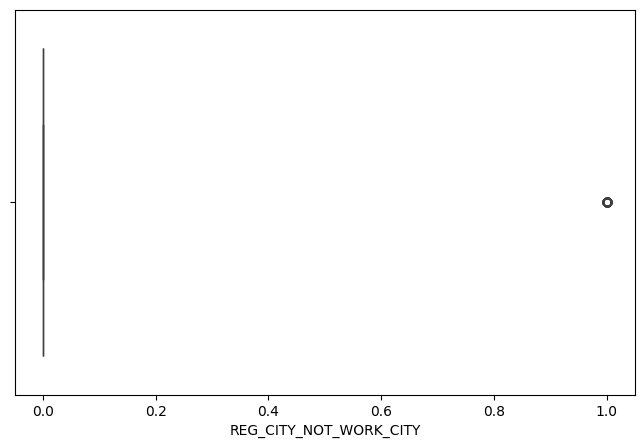

-----------------
count    358.000000
mean       0.201117
std        0.401397
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: LIVE_CITY_NOT_WORK_CITY, dtype: float64


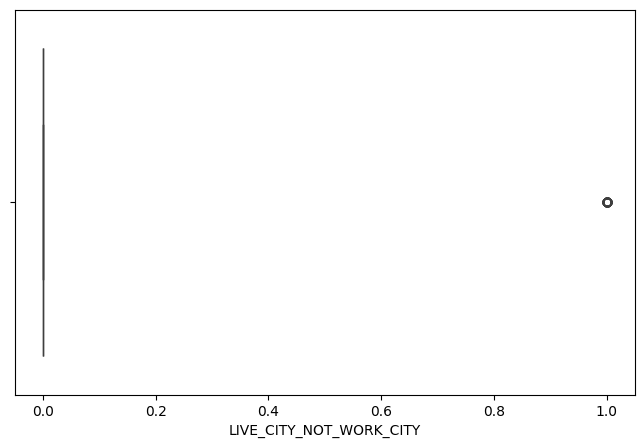

-----------------
count    358.000000
mean      44.516760
std       12.347603
min       22.000000
25%       34.000000
50%       43.500000
75%       54.750000
max       70.000000
Name: YEARS_BIRTH, dtype: float64


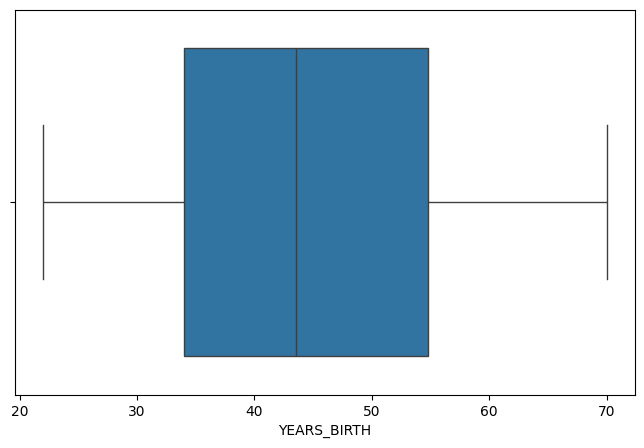

-----------------
count     358.000000
mean      168.446927
std       373.313389
min         0.000000
25%         2.000000
50%         6.000000
75%        14.000000
max      1025.000000
Name: YEARS_EMPLOYED, dtype: float64


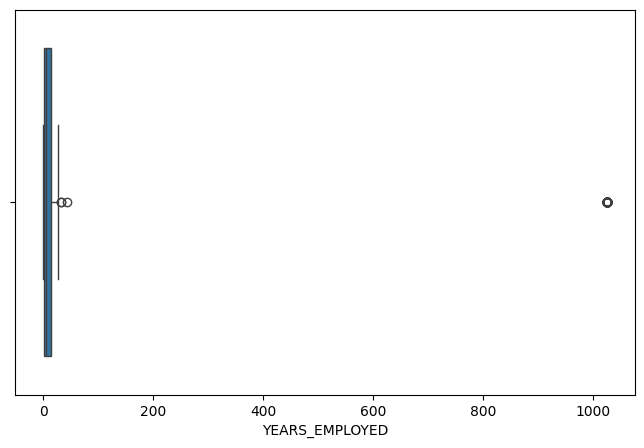

-----------------
count    358.000000
mean      13.139665
std        9.490526
min        0.000000
25%        5.000000
50%       12.000000
75%       19.000000
max       41.000000
Name: YEARS_REGISTRATION, dtype: float64


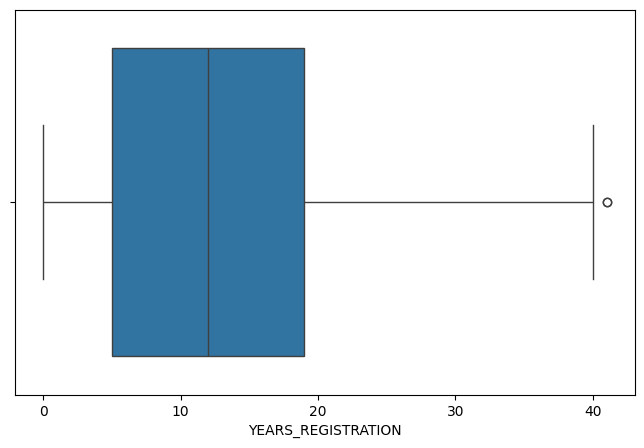

-----------------
count    358.000000
mean       7.807263
std        4.190058
min        0.000000
25%        5.000000
50%        8.000000
75%       11.000000
max       16.000000
Name: YEARS_ID_PUBLISH, dtype: float64


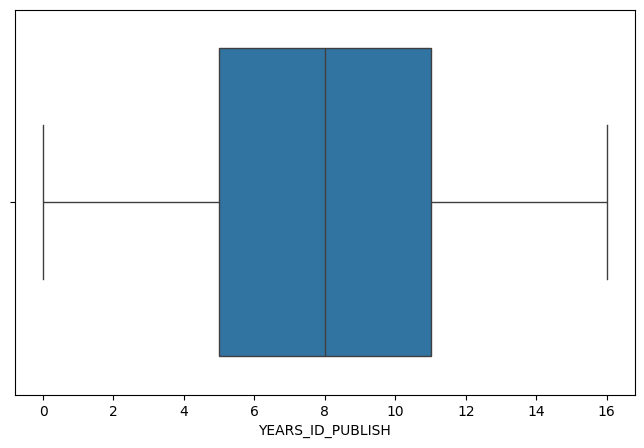

-----------------
count    358.000000
mean       2.175978
std        2.158894
min        0.000000
25%        0.000000
50%        2.000000
75%        4.000000
max        9.000000
Name: YEARS_LAST_PHONE_CHANGE, dtype: float64


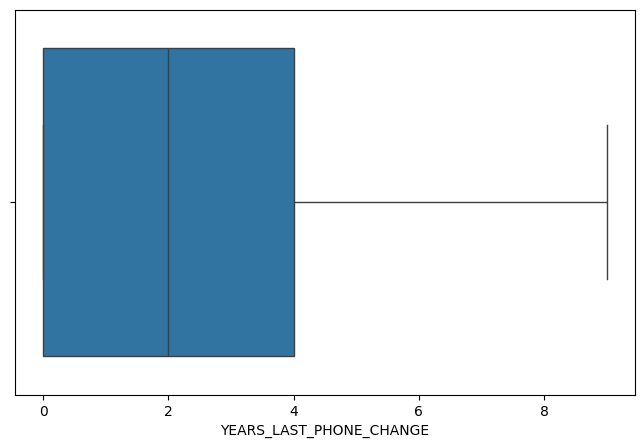

-----------------
count       358.000000
mean     170040.992053
std       93236.039300
min       36000.000000
25%      112500.000000
50%      157500.000000
75%      202500.000000
max      765000.000000
Name: AMT_INCOME_TOTAL, dtype: float64


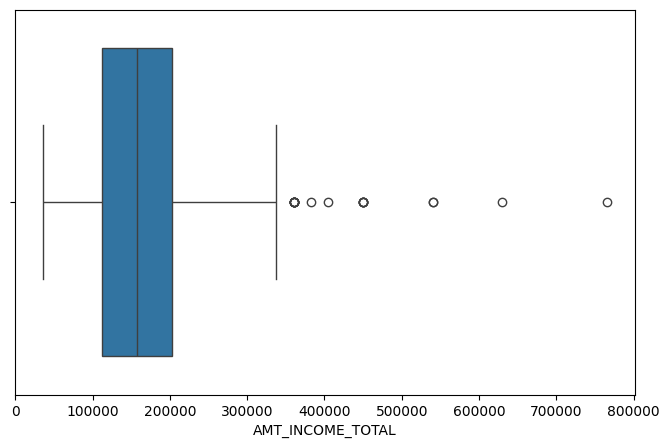

-----------------
count    3.580000e+02
mean     5.946904e+05
std      4.010158e+05
min      5.212800e+04
25%      2.700000e+05
50%      5.153940e+05
75%      7.819200e+05
max      2.250000e+06
Name: AMT_CREDIT, dtype: float64


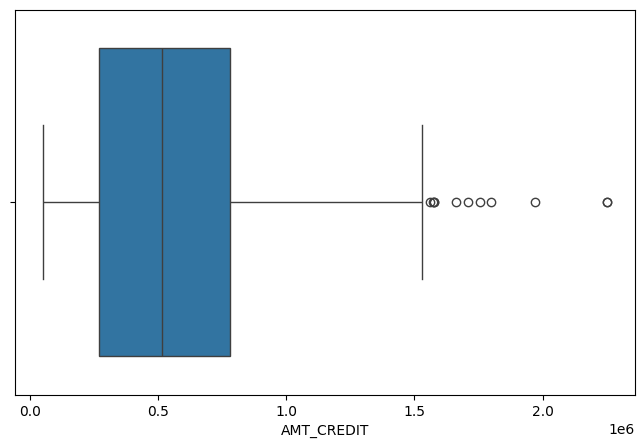

-----------------
count      358.000000
mean     26977.801676
std      14352.003315
min       4504.500000
25%      16471.125000
50%      25537.500000
75%      33386.625000
max      86989.500000
Name: AMT_ANNUITY, dtype: float64


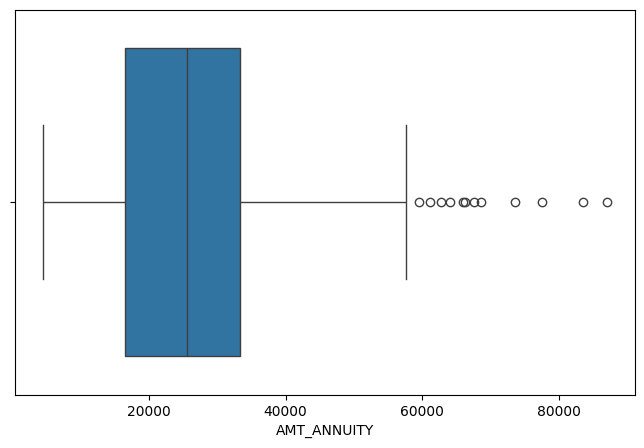

-----------------
count    3.580000e+02
mean     5.335894e+05
std      3.738666e+05
min      4.500000e+04
25%      2.385000e+05
50%      4.545000e+05
75%      6.750000e+05
max      2.250000e+06
Name: AMT_GOODS_PRICE, dtype: float64


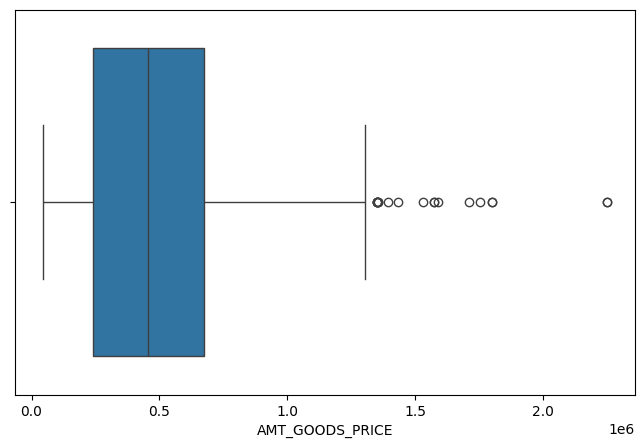

-----------------
count    358.000000
mean       0.020628
std        0.013703
min        0.002134
25%        0.010006
50%        0.018850
75%        0.026392
max        0.072508
Name: REGION_POPULATION_RELATIVE, dtype: float64


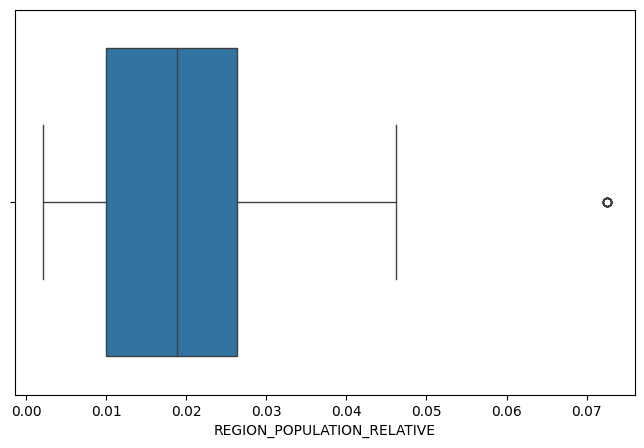

-----------------
count      358.000000
mean      4857.449721
std       3375.761485
min          3.000000
25%       2111.500000
50%       4600.500000
75%       7084.500000
max      14666.000000
Name: DAYS_REGISTRATION, dtype: float64


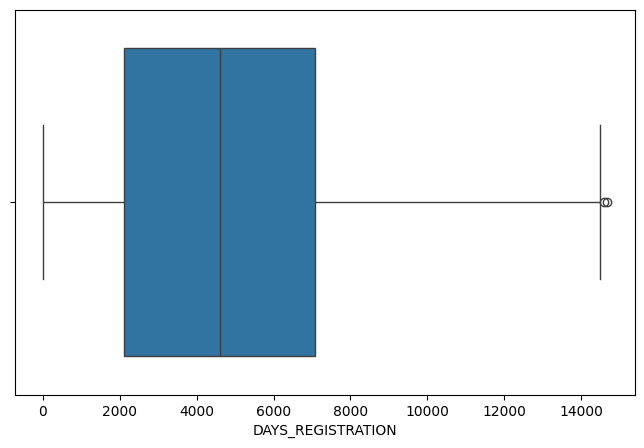

-----------------
count    358.000000
mean       2.106145
std        0.910515
min        1.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        5.000000
Name: CNT_FAM_MEMBERS, dtype: float64


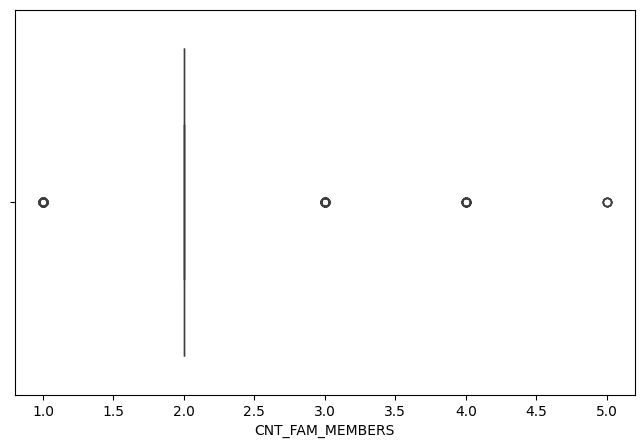

-----------------
count    358.000000
mean       0.518668
std        0.201000
min        0.010272
25%        0.391104
50%        0.586384
75%        0.669480
max        0.790970
Name: EXT_SOURCE_2, dtype: float64


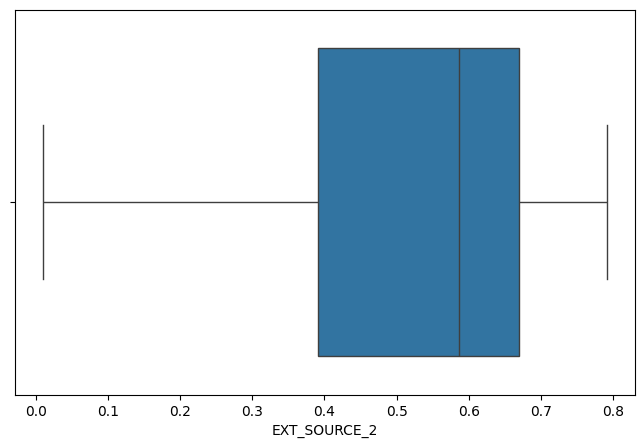

-----------------
count    358.000000
mean       0.510108
std        0.180229
min        0.051682
25%        0.417977
50%        0.524496
75%        0.639292
max        0.832785
Name: EXT_SOURCE_3, dtype: float64


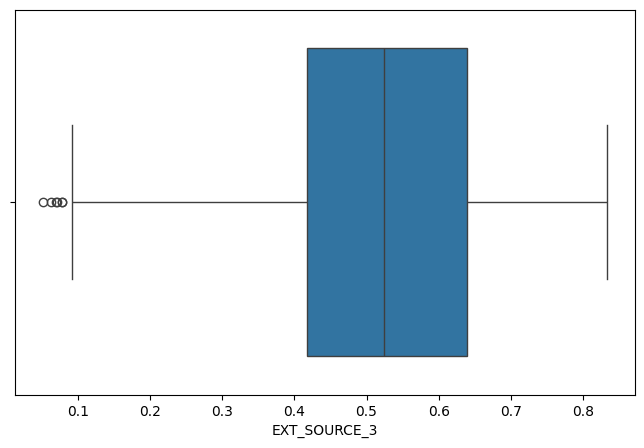

-----------------
count    358.000000
mean       1.220670
std        2.171606
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       13.000000
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: float64


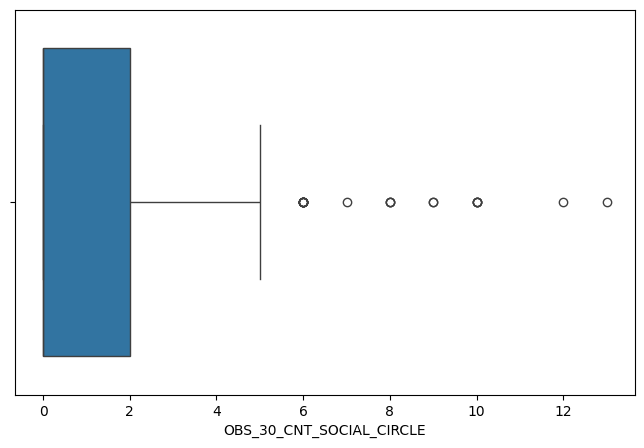

-----------------
count    358.000000
mean       0.131285
std        0.391898
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: float64


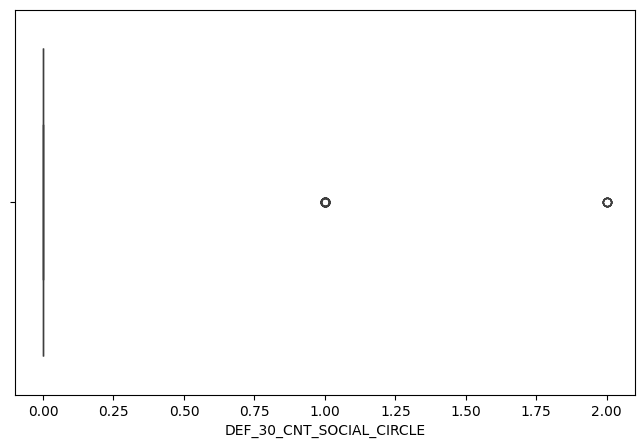

-----------------
count    358.000000
mean       1.203911
std        2.149923
min        0.000000
25%        0.000000
50%        0.000000
75%        2.000000
max       13.000000
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: float64


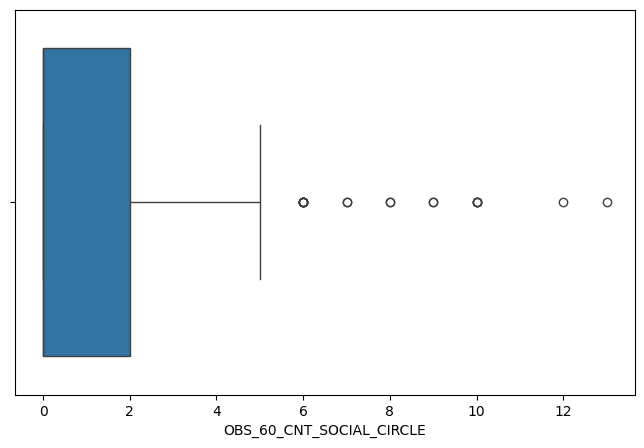

-----------------
count    358.000000
mean       0.083799
std        0.306265
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        2.000000
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: float64


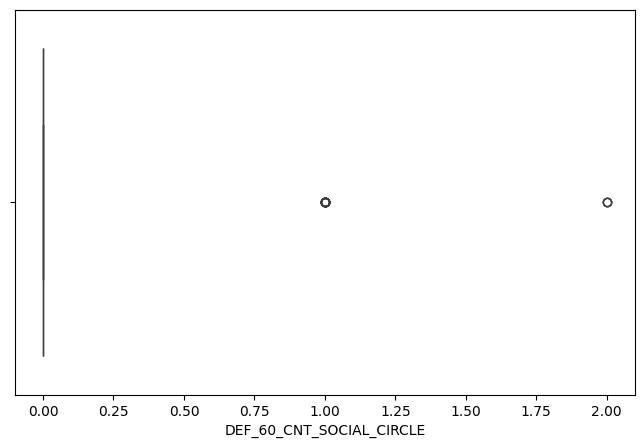

-----------------
count     358.000000
mean      918.315642
std       793.232523
min         0.000000
25%       218.500000
50%       737.000000
75%      1499.000000
max      3351.000000
Name: DAYS_LAST_PHONE_CHANGE, dtype: float64


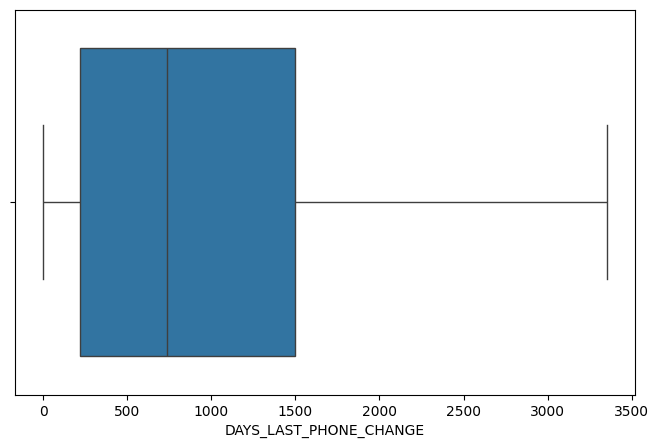

-----------------
count    358.000000
mean       0.011173
std        0.105258
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64


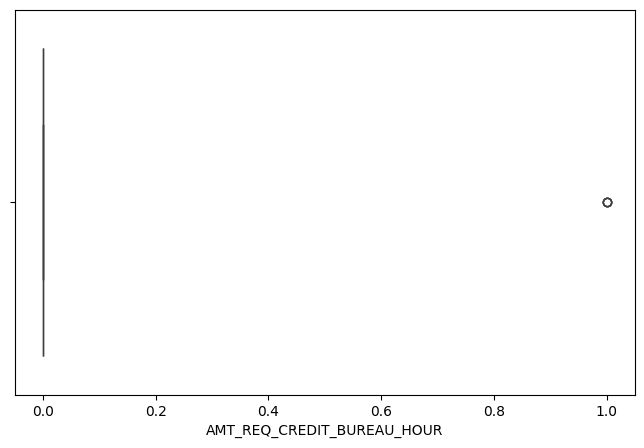

-----------------
count    358.000000
mean       0.005587
std        0.074639
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64


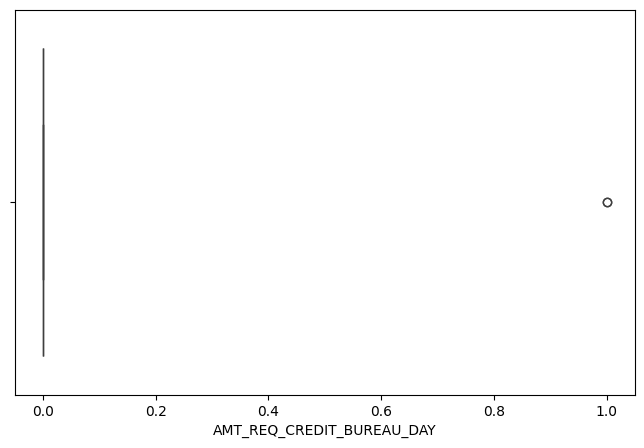

-----------------
count    358.000000
mean       0.022346
std        0.148014
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        1.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64


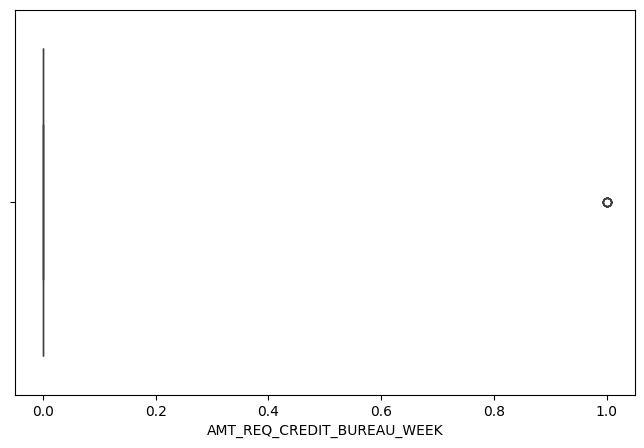

-----------------
count    358.000000
mean       0.153631
std        0.613915
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        6.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64


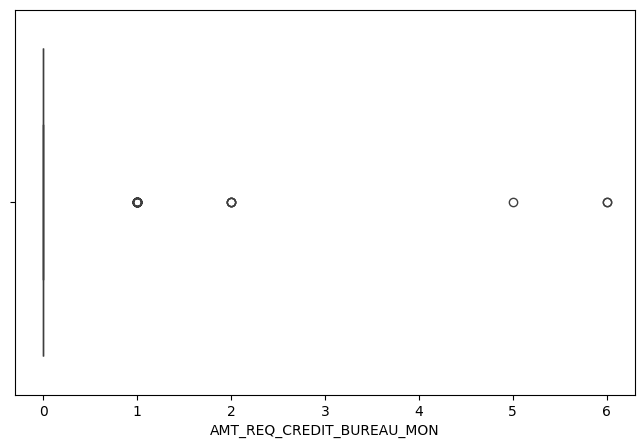

-----------------
count    358.000000
mean       0.240223
std        0.601913
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        4.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64


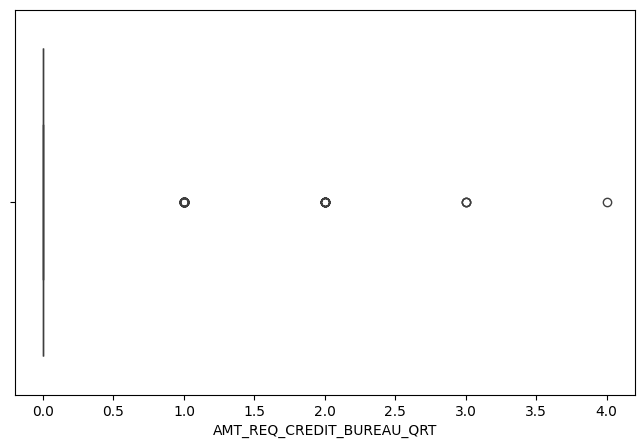

-----------------
count    358.000000
mean       1.614525
std        1.821752
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        9.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64


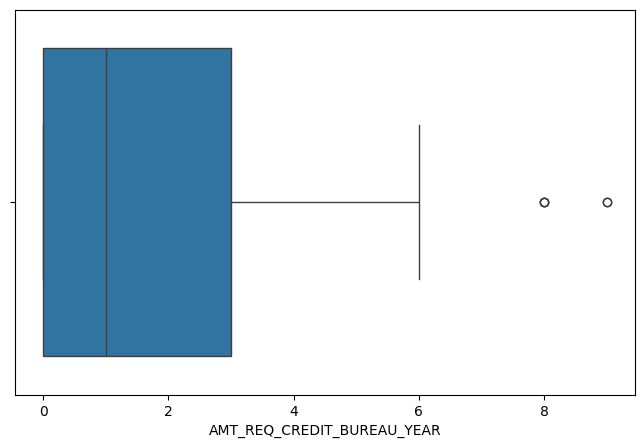

-----------------


In [494]:
for col in num_cols_withoutflag:
    print(app_df[col].describe())
    plt.figure(figsize = [8,5])
    sns.boxplot(data=app_df,x =col)
    plt.show()
    print("-----------------")

- Conclusion >> Few Columns are with outliers are below

1. AMT INCOME TOTAL Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge
variation in mean and median due to outliers

2. AMT CREDIT Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variati in mean and median due to outliers

3. AMT ANNUITY Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers:

4. AMT GOODS_PRICE Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see significant variation in mean and median due to outliers

5. REGION POPULATION_RELATIVE Column has a one outliers and there not much difference between mean and median

### Univariate Analysis on Columns with Target 0 and 1

Plot on NAME_CONTRACT_TYPE for Target  0 and 1


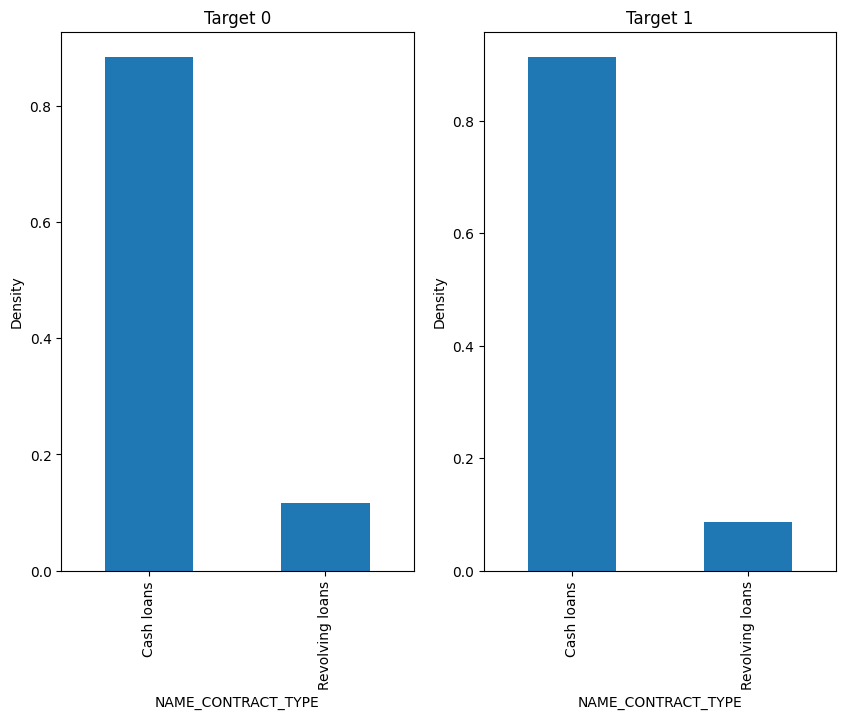



-------------------------------------------


Plot on CODE_GENDER for Target  0 and 1


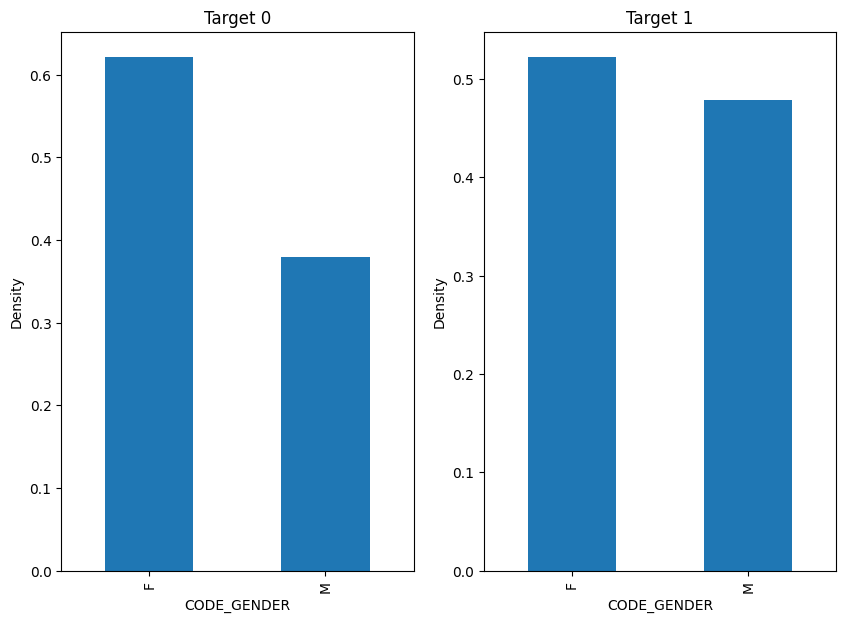



-------------------------------------------


Plot on FLAG_OWN_CAR for Target  0 and 1


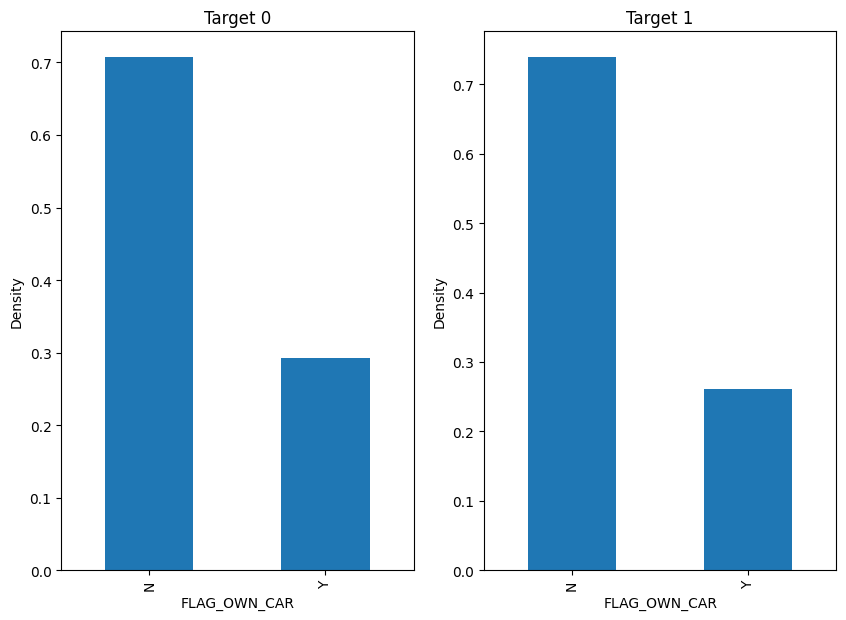



-------------------------------------------


Plot on FLAG_OWN_REALTY for Target  0 and 1


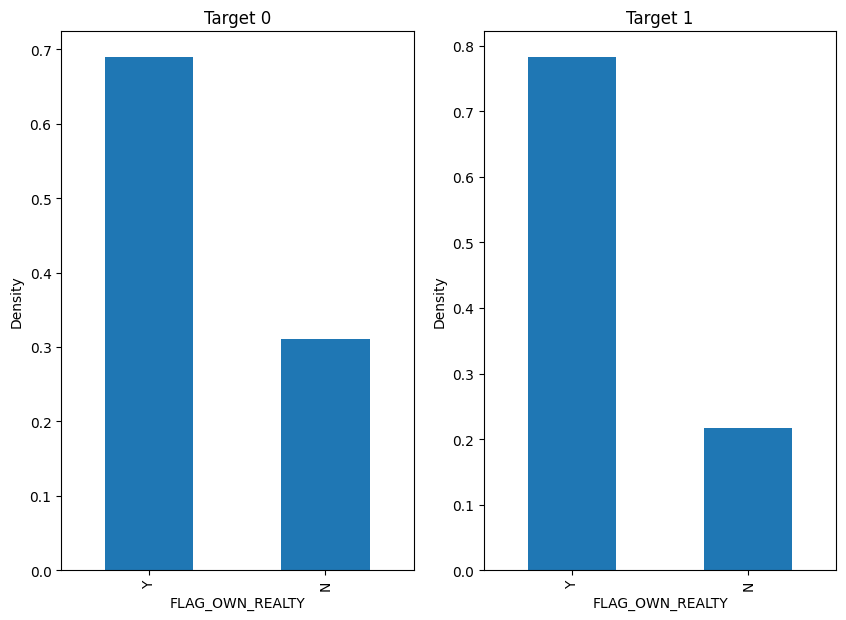



-------------------------------------------


Plot on NAME_TYPE_SUITE for Target  0 and 1


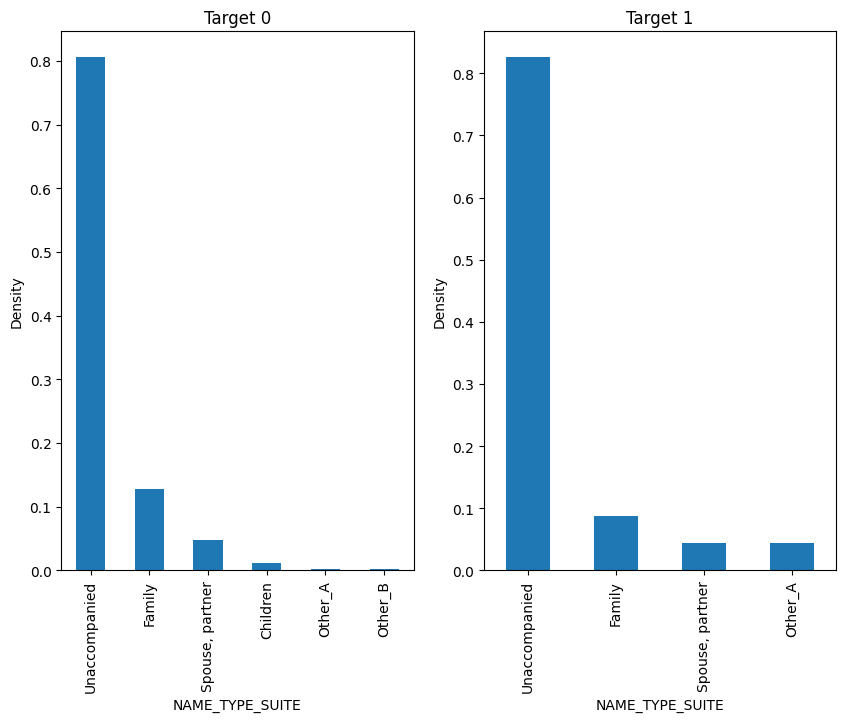



-------------------------------------------


Plot on NAME_INCOME_TYPE for Target  0 and 1


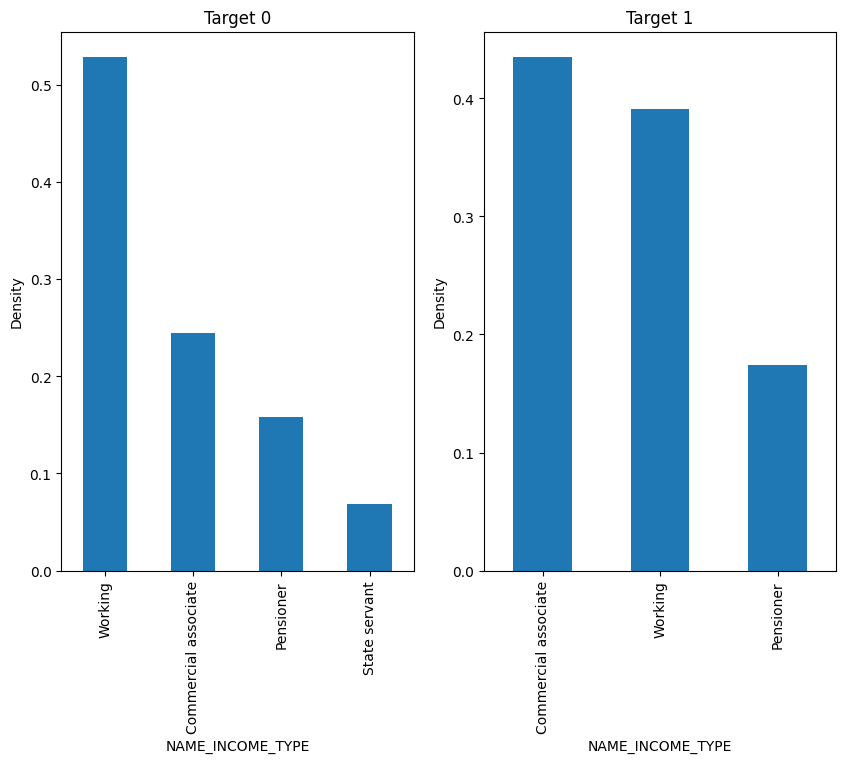



-------------------------------------------


Plot on NAME_EDUCATION_TYPE for Target  0 and 1


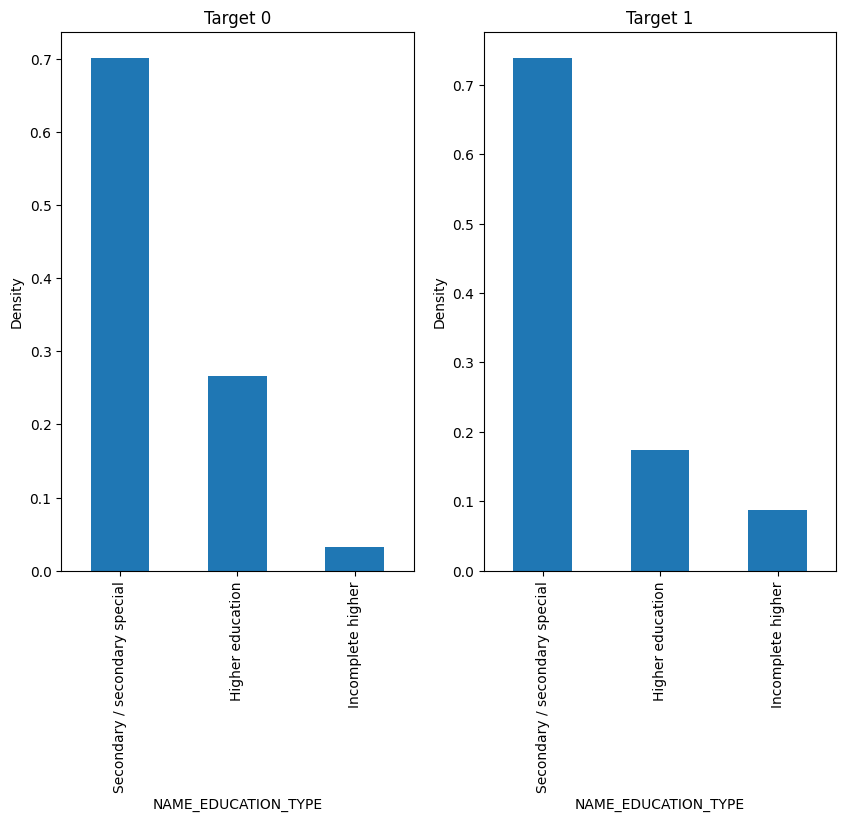



-------------------------------------------


Plot on NAME_FAMILY_STATUS for Target  0 and 1


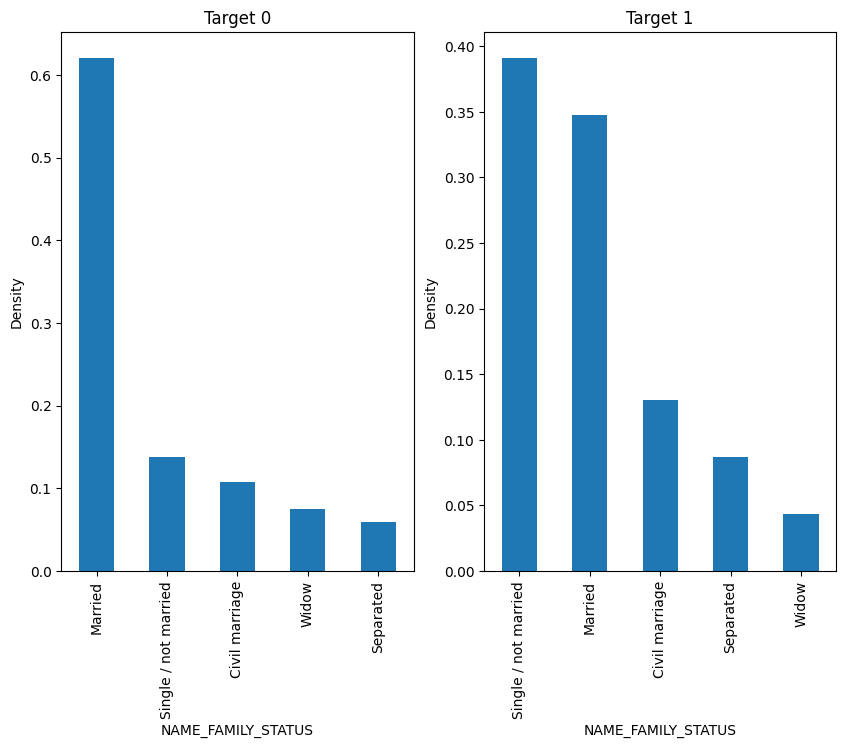



-------------------------------------------


Plot on NAME_HOUSING_TYPE for Target  0 and 1


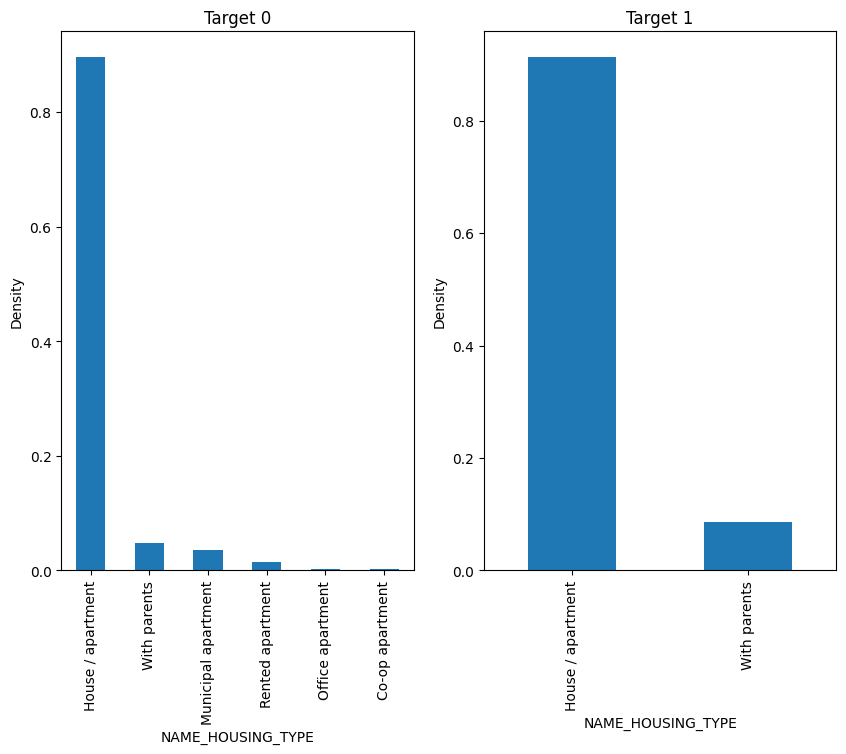



-------------------------------------------


Plot on OCCUPATION_TYPE for Target  0 and 1


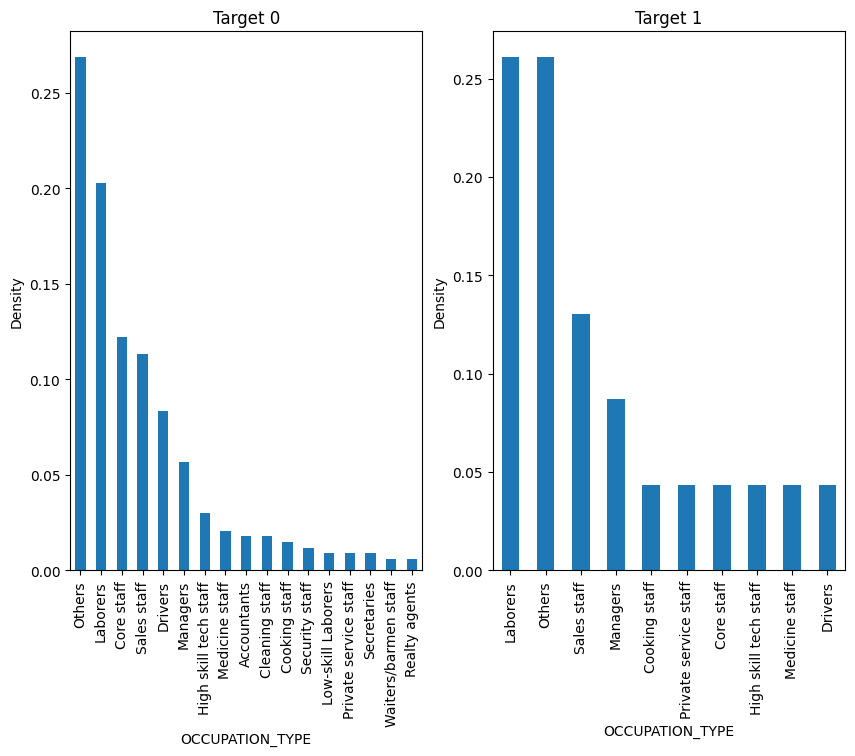



-------------------------------------------


Plot on WEEKDAY_APPR_PROCESS_START for Target  0 and 1


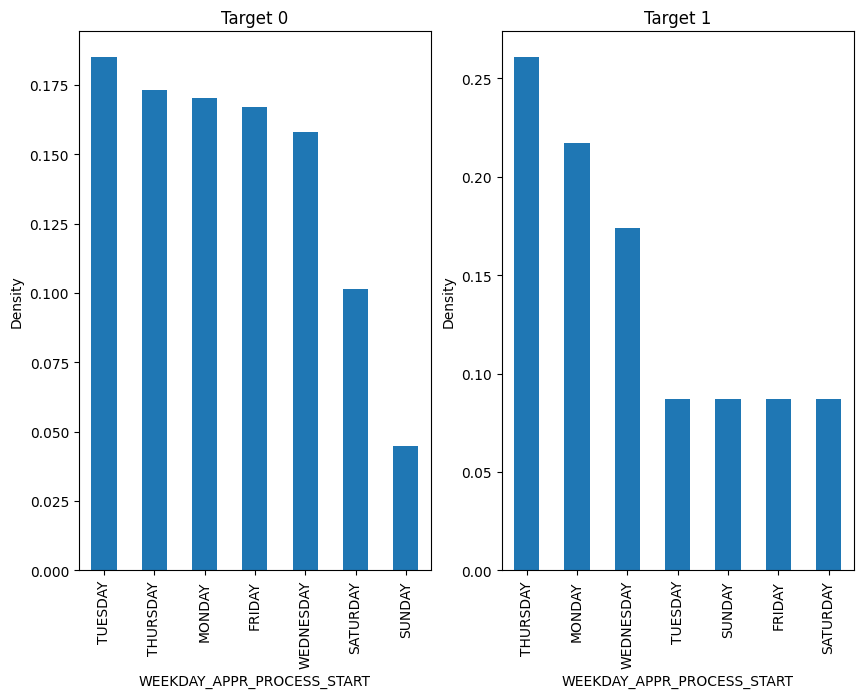



-------------------------------------------


Plot on ORGANIZATION_TYPE for Target  0 and 1


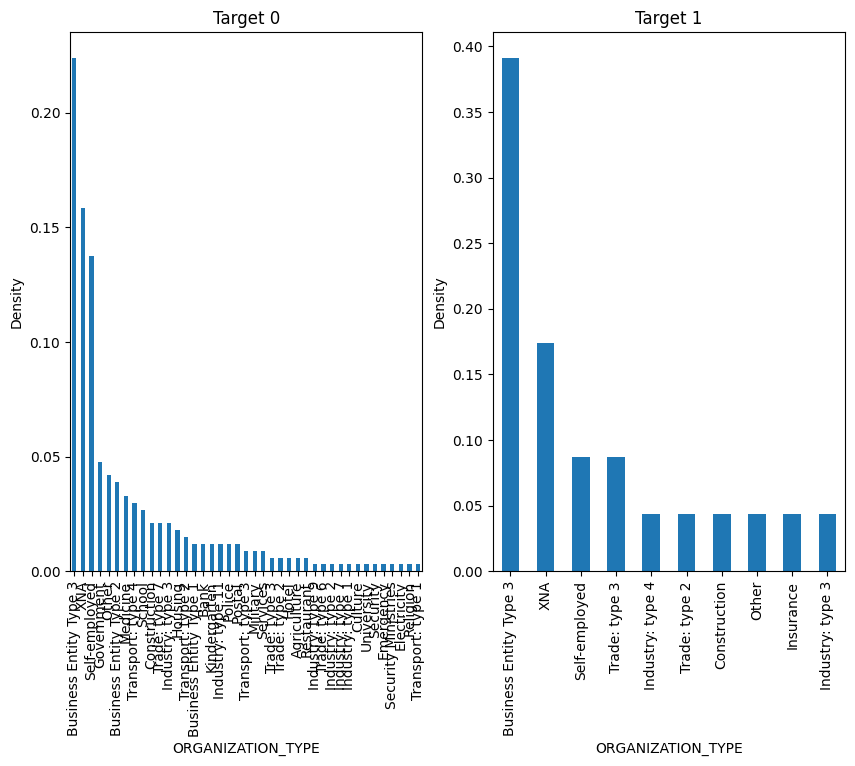



-------------------------------------------




In [495]:
for col in cat_cols:
    print(f"Plot on {col} for Target  0 and 1")
    plt.figure(figsize=[10,7])
    plt.subplot(1,2,1)
    tar_0[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 0")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.subplot(1,2,2)
    tar_1[col].value_counts(normalize=True).plot.bar()
    plt.title("Target 1")
    plt.xlabel(col)
    plt.ylabel("Density")
    plt.show()
    print("\n\n-------------------------------------------\n\n")
    
    

- Conclusion >> Below are the column insights

1 NAME_CONTRACT TYPE- The Applicants are receiving more of Cash loans than Revolving loans both for Target 0 and 1

2 CODE GENDER Number of Female applicants are twice than that of male applicants both for Target 0 and 1

3. FLAG_OWN_CAR-Most(70%) of the applicants do not own a car both for Target 0 and 1

4 FLAG_OWN_REALTY Most(70%) of the applicants do not own a house both for Target 0 and 1 5. NAME TYPE SUITE Most(81%) of the applicants are Unaccompanied both for Target 0 and 1

6 NAME INCOME TYPE-For both Target 0 and 1, Most(51%) of the applicants are eaming their income from Work

7 NAME EDUCATION TYPE-For both Target 0 and 1 almost 71% of the applicants have completed Secondary/secondary special education

8 NAME FAMILY STATUS-63% of the applicants are mamed tor both Target D and 1

9 NAME HOUSING TYPE-88% of the housing type of applicants are House/apartment for both Target 0 and 1

10 OCCUPATION TYPE Most(31%) of the applicants have other Occupation type are non detaulters and i aborere, Sales staft Drivers and core staff are not able to repay the loan on time

11 WEEKDAY APPR_PROCESS START-Most of the applicant have applied the loan on Tuseday and the least on Sunday

12. ORGANIZATION TYPE-Most of the Applicants are working in Business Entity Type 3, Self Employed and other Organization type

#### Analysis On AMT_GOODS_PRICE on Target 0 and 1

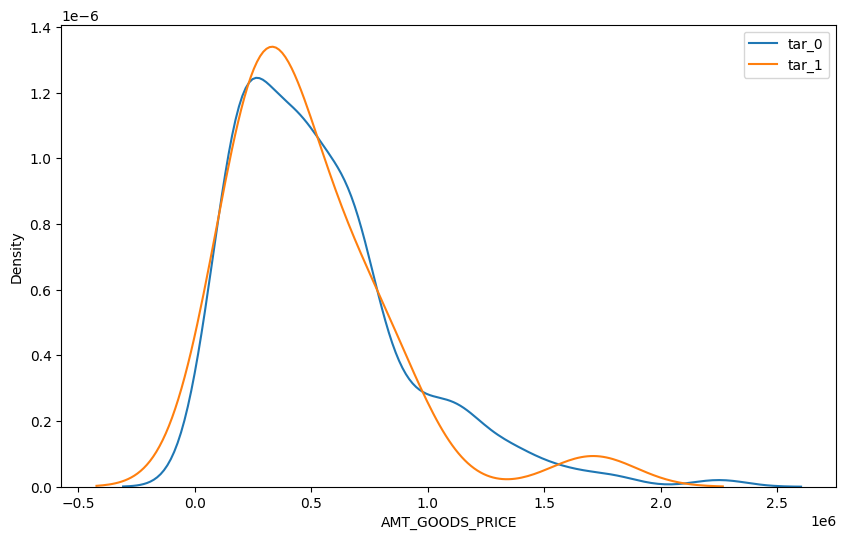

In [496]:
plt.figure(figsize = (10,6))
sns.distplot(tar_0['AMT_GOODS_PRICE'],label='tar_0',hist=False)
sns.distplot(tar_1['AMT_GOODS_PRICE'],label='tar_1',hist=False)
plt.legend()
plt.show()

- Conclusion : The price of the Goods for which loan is given has the same variation for Target 0 and 1

# Bivariate and Multivariate Analysis
### Bivariate Analysis between WEEKDAY_APPR_PROCESS_START vs HOUR_APPR_PROCESS_START

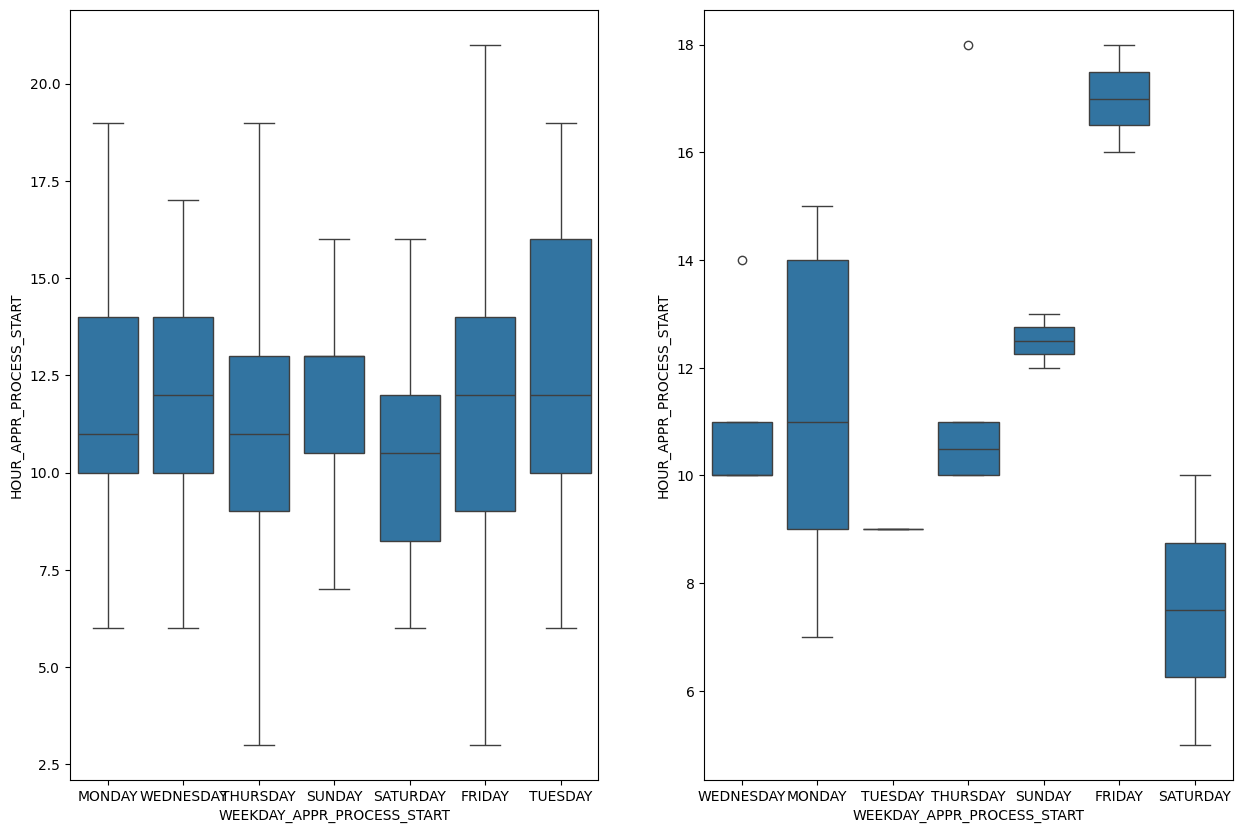

In [497]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START',y = 'HOUR_APPR_PROCESS_START',data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x='WEEKDAY_APPR_PROCESS_START',y = 'HOUR_APPR_PROCESS_START',data=tar_1)
plt.show()

Conclusion >>

1 The Bank operates between 10am to 3pm except for Saturday and Sunday, its between 10am to 2pm

2. We can observe that around 11:30am to 12pm around 50% of Customers visit the branch for loan application on all the days except for Saturday where the time is between 10am to 11am for both. Target 0 and 1

3. The loan defaulters have applied tor the loan between 9:30am-10am and 2pm where as the applicants who repay the loan on time have applied for the loan between 10am to 3pm

#### Bivariate Analysis between AGE_CATEGORY Vs AMT_CREDIT

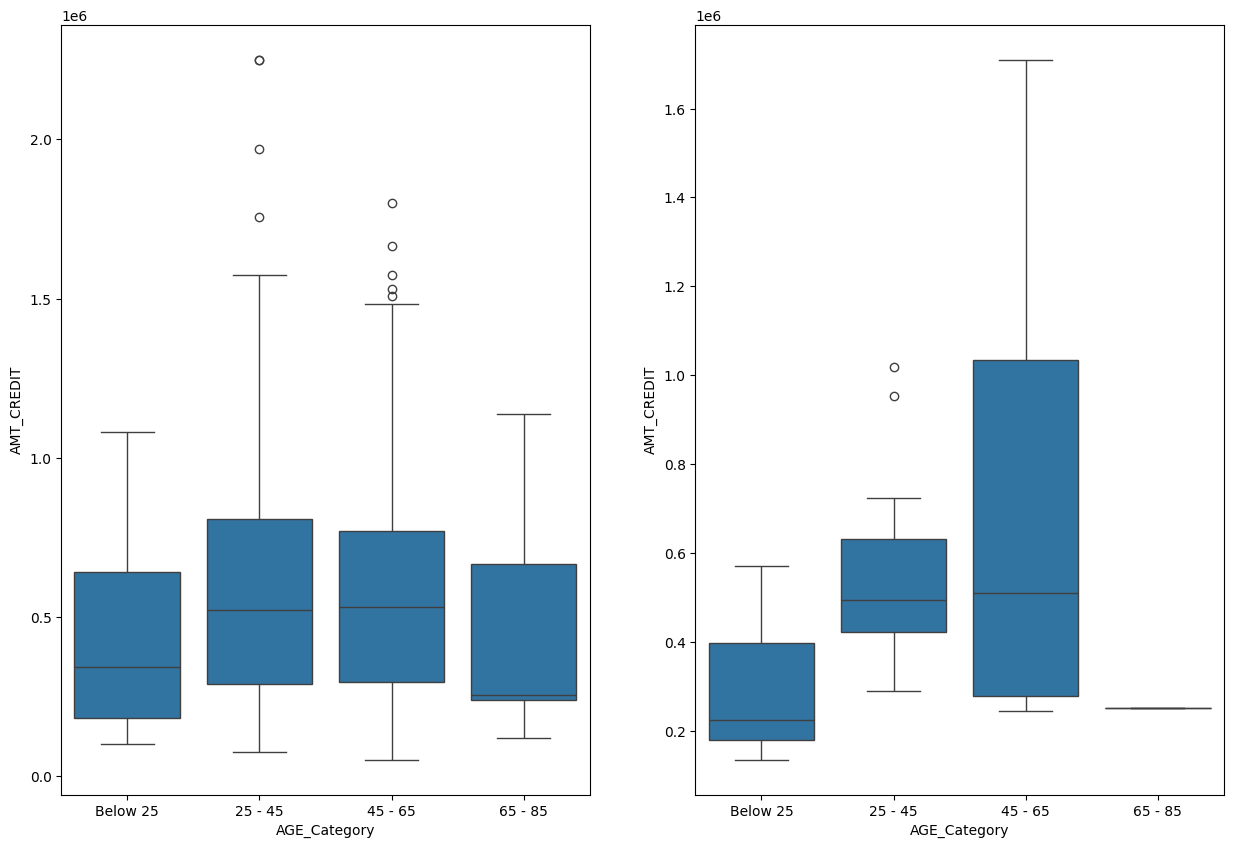

In [498]:
plt.figure(figsize=(15,10))
plt.subplot(1,2,1)
sns.boxplot(x='AGE_Category',y = 'AMT_CREDIT',data=tar_0)
plt.subplot(1,2,2)
sns.boxplot(x='AGE_Category',y = 'AMT_CREDIT',data=tar_1)
plt.show()

- Conclusion >>

1. The applicants between age group 25 to 65 have Credit amount of the loan less than 2500000 and are able to repay the loan property 2. The applicants with less than 100000 Credit amount are with age group greater than 65 may be considered as loan defaulters

3. Most applicants who have Credit amount of the loan less than 1700000 are loan defaulters with 25 and less age

### Pair Plot of Amount Columns for Target 0

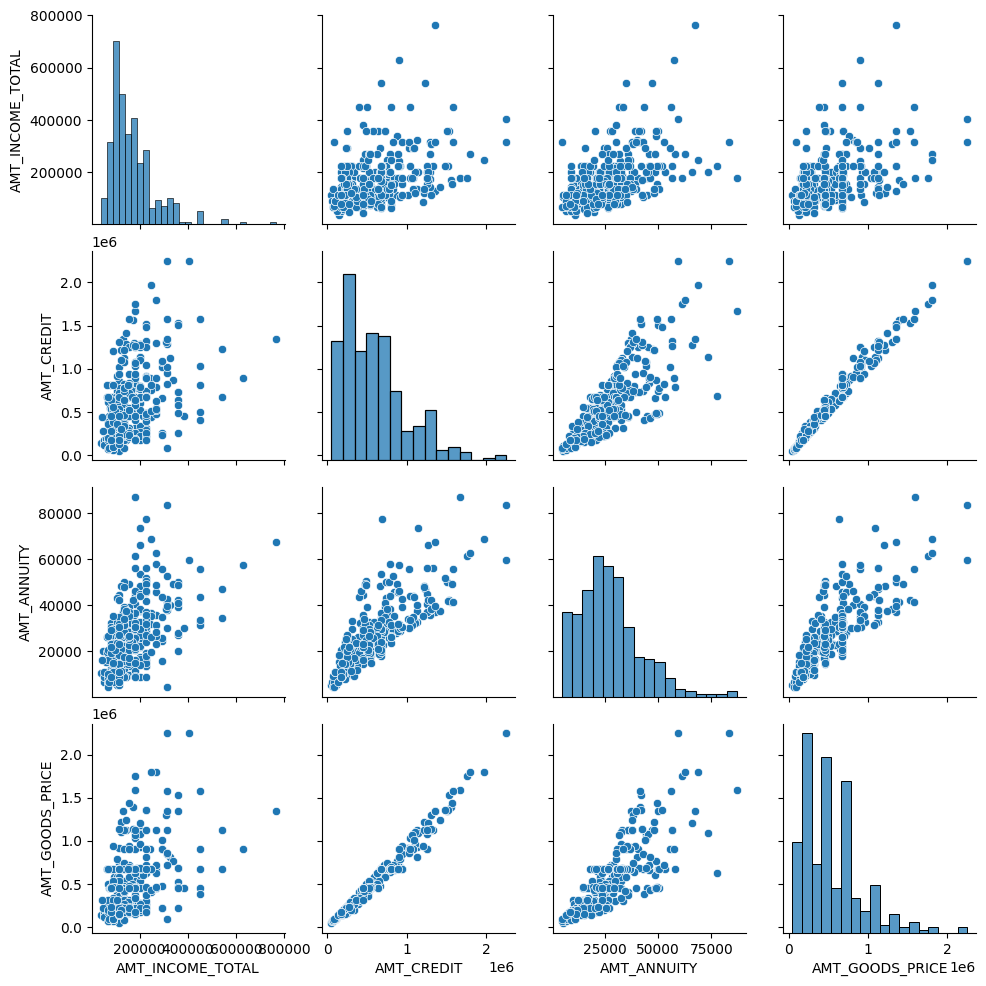

In [499]:
sns.pairplot(tar_0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]])
plt.show()

- Conclusion >> For Applicants who are able to replay the loan on time

1. AMT CREDIT Increases or varies linearly with AMT_GOODS_PRICE and AMT_CREDIT Increases with AMT ANNUITY

2. AMT ANNUITY Increases with Increases in AMT GOODS PRICE and AMT Credit 3. AMT GOODS_PRICE Increases with Increases in AMT_Credit and AMT_ANNUITY

4. AMT INCOME TOTAL has a drastic Increase with slight increase in AMT_CREDIT, AMT_ANNUITY, AMT_GOODS_PRICE

### Pair Plot of Amount Columns for Target 1

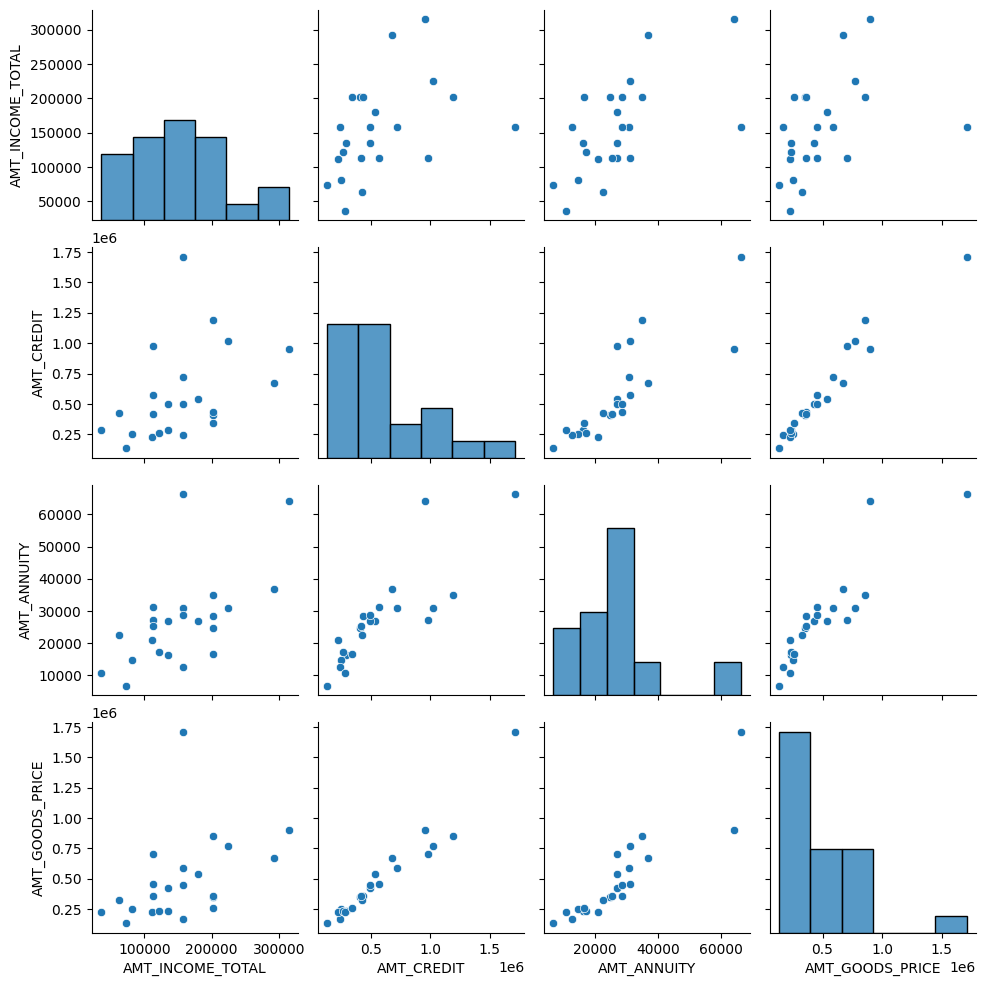

In [500]:
sns.pairplot(tar_1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE"]])
plt.show()

- Conclusion >> For Applicants who are unable to replay the loan on time

1. AMT CREDIT Increases or varies linearty with AMT GOODS PRICE and AMT CREDIT Increases with AMT ANNUITY

2 AMT ANNUITY Increases with Increases in AMT GOODS PRICE and AlMT Credit

3

AMT GOODS PRICE Increases with Increases in AMT Credit and AMT ANNUITY

4 AMT INCOME TOTAL has a drastic Increase with slight increase in AMT CREDIT AMT ANNUITYAMT_GOODS_PRICE



### Co-relation between Numerial Columns

In [501]:
corr_data=app_df[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH","YEARS_LAST_PHONE_CHANGE"]]
corr_data.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,202500.0,406597.5,24700.5,351000.0,26,1,10,5,3
1,270000.0,1293502.5,35698.5,1129500.0,47,3,3,0,2
2,67500.0,135000.0,6750.0,135000.0,53,0,11,7,2
3,135000.0,312682.5,29686.5,297000.0,53,8,27,6,1
4,121500.0,513000.0,21865.5,513000.0,55,8,12,9,3


In [502]:
corr_data.corr()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
AMT_INCOME_TOTAL,1.000000,0.426049,0.521917,0.435408,-0.092655,-0.195422,-0.135316,-0.067910,-0.067022
AMT_CREDIT,0.426049,1.000000,0.802348,0.985856,0.026753,-0.117532,-0.060426,0.008877,0.069705
AMT_ANNUITY,0.521917,0.802348,1.000000,0.806993,-0.012132,-0.127755,-0.088668,0.015853,0.047383
AMT_GOODS_PRICE,0.435408,0.985856,0.806993,1.000000,0.024844,-0.123025,-0.071952,0.017684,0.071881
YEARS_BIRTH,-0.092655,0.026753,-0.012132,0.024844,1.000000,0.598992,0.314118,0.258831,0.124566
YEARS_EMPLOYED,-0.195422,-0.117532,-0.127755,-0.123025,0.598992,1.000000,0.183896,0.255094,0.002293
YEARS_REGISTRATION,-0.135316,-0.060426,-0.088668,-0.071952,0.314118,0.183896,1.000000,0.120216,0.041998
YEARS_ID_PUBLISH,-0.067910,0.008877,0.015853,0.017684,0.258831,0.255094,0.120216,1.000000,0.172213
YEARS_LAST_PHONE_CHANGE,-0.067022,0.069705,0.047383,0.071881,0.124566,0.002293,0.041998,0.172213,1.000000


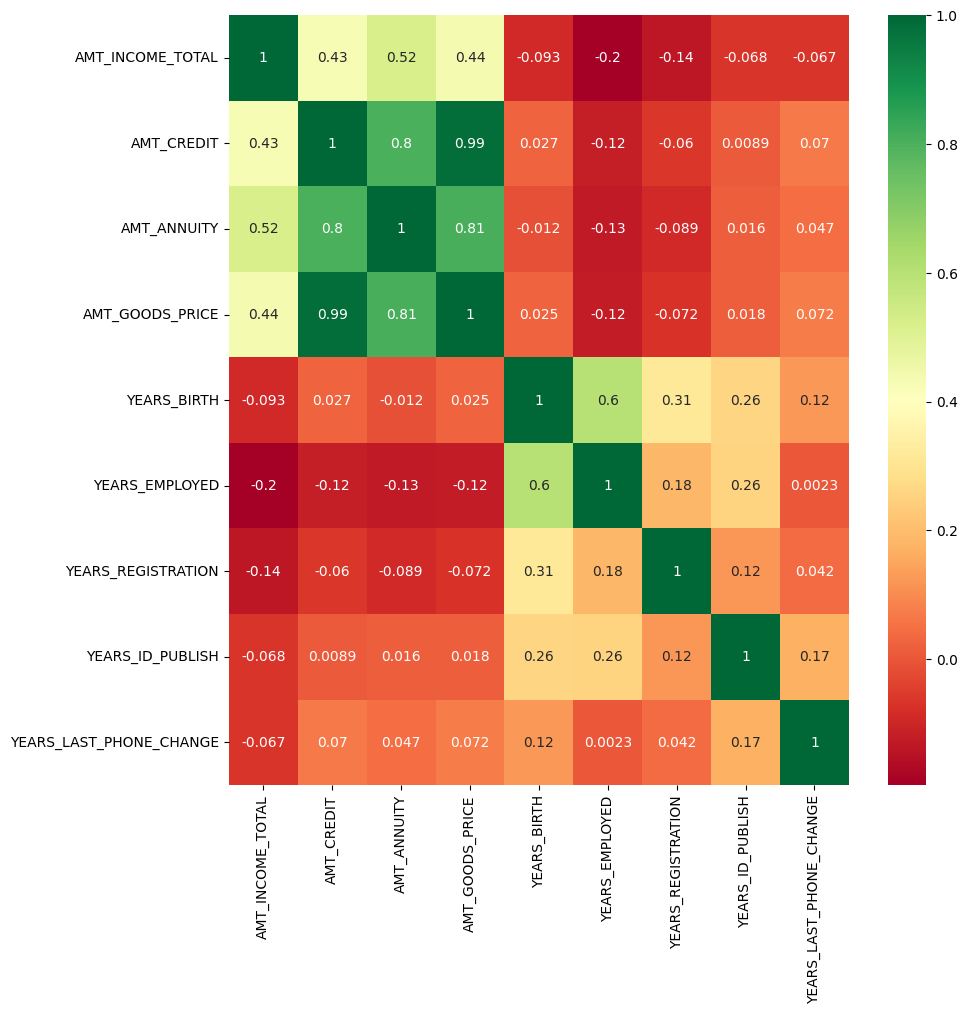

In [503]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_data.corr(), annot=True, cmap="RdYlGn")
plt.show()


- Conclusion

1. AMT INCOME TOTAL-It has a positive coretation index of 0.16.0 19.0.15 with AMT CREDITAMT ANNUITY AMT GOODS PRICE respectively

2. AMT CREDIT-is tas negative coreftaion index of 0.064 with YEARS EMPLOYED and positive coretonnes of 0 39.0.77 with AMT GOODS PRICE AMT ANNUITY respectively

3 AMT ANNUITY is has negative comiftaion index of 0.1 with YEARS EMPLOYED and positive contain nork of 077 with AMT CREENT

4. AMT_GOODS PRICE has a positive corelation with AMT CREDITAMT ANNUITY 5 YEARS BIRTH-It has a positive corelation with YEARS EMPLOYED AMT GOODS PRICE and negative conetaion with

AMT ANNUITY AMT INCOME TOTAL 6 YEARS EMPLOYED is has negative corestaion index OTO 1 with AMT ANNUITY and has a positive coresation with YEARS REGISTRATION

YEARS ID PUBLISH YEARS REGISTRATION- has a positive corelation with YEARS ID PUBLISH YEARS BIRTH YEARS EMPLOYED

& YEARS ID PUBLISH-It has a positive corelation with YEARS REGISTRATION and negative coretion with AT INCOME TOTALAMT ANNUITY

5 YEARS LAST PHONE CHANGE- has negative coreftaion with YEARS EMPLOYED and positive corriation with AMT_GOODS PRICE YEARS ID PUBLISH

### Split the Numerical variables based on Target 0 and 1 to find the co-relation

In [504]:
corr_data_0=tar_0[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH","YEARS_LAST_PHONE_CHANGE"]]
corr_data_0.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
1,270000.0,1293502.5,35698.5,1129500.0,47,3,3,0,2
2,67500.0,135000.0,6750.0,135000.0,53,0,11,7,2
3,135000.0,312682.5,29686.5,297000.0,53,8,27,6,1
4,121500.0,513000.0,21865.5,513000.0,55,8,12,9,3
5,99000.0,490495.5,27517.5,454500.0,47,4,13,1,7


In [505]:
corr_data_1=tar_1[["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_BIRTH","YEARS_EMPLOYED","YEARS_REGISTRATION","YEARS_ID_PUBLISH","YEARS_LAST_PHONE_CHANGE"]]
corr_data_1.head()

,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE
0,202500.0,406597.5,24700.5,351000.0,26,1,10,5,3
26,112500.0,979992.0,27076.5,702000.0,52,7,18,5,0
40,202500.0,1193580.0,35028.0,855000.0,49,3,3,2,3
42,135000.0,288873.0,16258.5,238500.0,37,10,0,12,4
81,81000.0,252000.0,14593.5,252000.0,69,1025,15,11,0


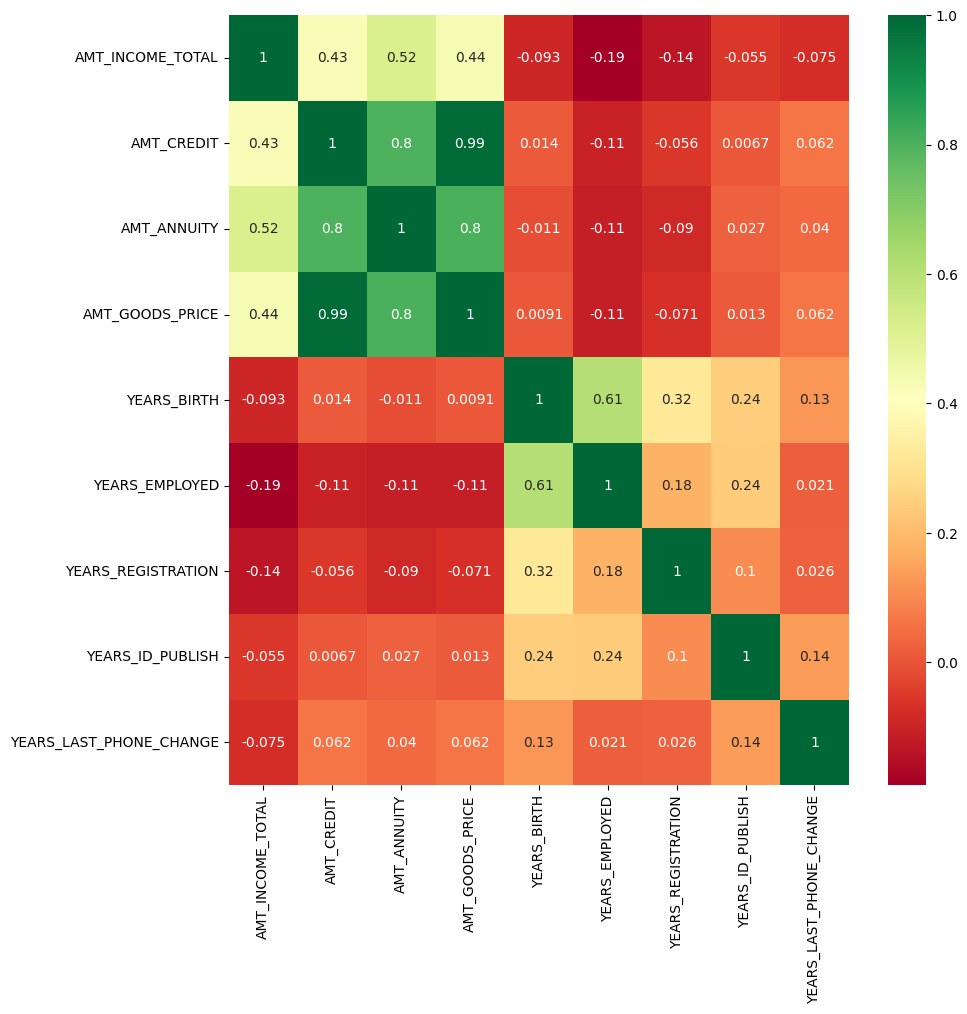

In [506]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_data_0.corr(), annot=True, cmap="RdYlGn")
plt.show()

- Conclusion >>

YEARS LAST PHONE

1. AMT_INCOME TOTAL-It has a positive corelation index of 0.34.0.42,0.35 with AMT_CREDITAMT_ANNUITY AMT_GOODS_PRICE respectively and Negative with most of the other Year columns

2. AMT CREDIT-Is has a strong positive corestaion index of 0.99 0.77 with AMT GOODS_PRICE AMT_ANNUITY respectively

3. AMT_ANNUITY - is has positive coreltaion index of 0 77.0.78mAMT_CREDIT AMT_GOODS_PRICE respectively and N Year columns Negative with most of the other

4. AMT_GOODS_PRICE - It has a strong positive corelation index 0.78.0.99 with AMT ANNUITY AMT_CREDIT

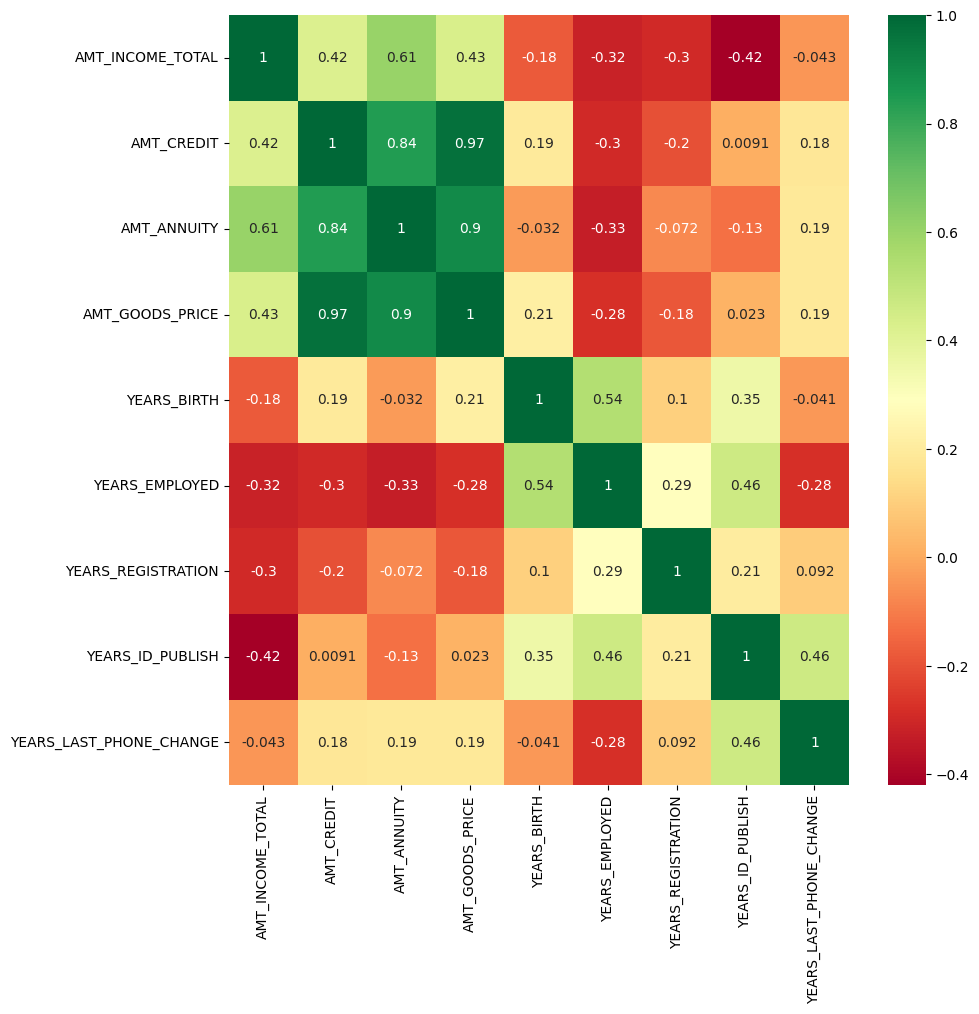

In [507]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr_data_1.corr(), annot=True, cmap="RdYlGn")
plt.show()

- Conclusion >>>

AMT_INCOMETOTAL-It is less correlated with AMT_CREDITAMT_ANNUITY AMT_GOODS_PRICE respectively

1 2. AMT CREDIT-Is has a strong positive coreltaion index of 0.98.075 with AMT_GOODS_PRICE, AMT ANNUITY respectively and also positive corelation with other Year Columns

3. AMT ANNUITY-is nas positive coreltaion index of 0.75 with AMT_CREDIT AMT_GOODS_PRICE and Negative with YEAR EMPLOYED YEAR REGISTRATION

4. AMT_GOODS PRICE - It has a strong positive corelation index 0 75,098 with AMT_ANNUITY, AMT_CREDIT and weak positive corelation with other Year columns

## Read Previous Application CSV

In [508]:
papp_data = pd.read_csv("previous_application.csv")
papp_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Data Inspection On Application Dataset


#### Get info and shape on the dataset

In [509]:
papp_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 809 entries, 0 to 808
Data columns (total 37 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_PREV                   809 non-null    int64  
 1   SK_ID_CURR                   809 non-null    int64  
 2   NAME_CONTRACT_TYPE           809 non-null    object 
 3   AMT_ANNUITY                  640 non-null    float64
 4   AMT_APPLICATION              809 non-null    float64
 5   AMT_CREDIT                   809 non-null    float64
 6   AMT_DOWN_PAYMENT             444 non-null    float64
 7   AMT_GOODS_PRICE              649 non-null    float64
 8   WEEKDAY_APPR_PROCESS_START   809 non-null    object 
 9   HOUR_APPR_PROCESS_START      809 non-null    int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  809 non-null    object 
 11  NFLAG_LAST_APPL_IN_DAY       809 non-null    int64  
 12  RATE_DOWN_PAYMENT            444 non-null    float64
 13  RATE_INTEREST_PRIMAR

In [510]:
papp_data.shape

(809, 37)

## Data Quality Check

## check for percentage null values in Application dataset

In [511]:
papp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    20.889988
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               45.117429
AMT_GOODS_PRICE                19.777503
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              45.117429
RATE_INTEREST_PRIMARY          99.381953
RATE_INTEREST_PRIVILEGED       99.381953
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                51.297899
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [512]:
percentage = 45
threshold_p = int(((100 - percentage) / 100) * papp_data.shape[0] + 1)
papp_df = papp_data.dropna(axis = 1,thresh = threshold_p)

papp_df.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,17145.0,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,607500.0,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,112500.0,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,450000.0,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,337500.0,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [513]:
papp_df.shape

(809, 32)

# Impute Missing Values

## Check the missing Values in application dataset before imputing

In [514]:
for col in papp_df.columns:
    if papp_df[col].dtypes == np.int64 or papp_df[col].dtypes ==np.float64:
        papp_df[col]=papp_df[col].apply(lambda x :abs(x))

### Validate if any null values present in dataset

In [515]:
null_cols = list(papp_df.columns[papp_df.isna().any()])
len(null_cols)

9

In [516]:
papp_data.isnull().mean()*100

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    20.889988
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT               45.117429
AMT_GOODS_PRICE                19.777503
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              45.117429
RATE_INTEREST_PRIMARY          99.381953
RATE_INTEREST_PRIVILEGED       99.381953
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                51.297899
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

### Binning  of continous variables
### Binning AMT_CREDIT Column

In [517]:
papp_df.AMT_CREDIT.describe()

count    8.090000e+02
mean     1.714404e+05
std      2.781548e+05
min      0.000000e+00
25%      2.866050e+04
50%      7.393500e+04
75%      1.782900e+05
max      2.241513e+06
Name: AMT_CREDIT, dtype: float64

In [518]:
papp_df["AMT_CREDIT_Category"] = pd.cut(papp_df.AMT_CREDIT, [0,200000,400000,600000,800000,10000000],
                            labels = ["Very-low Credit","Low-Credit","Medium-Credit","High-Credit","Very-High Credit"])

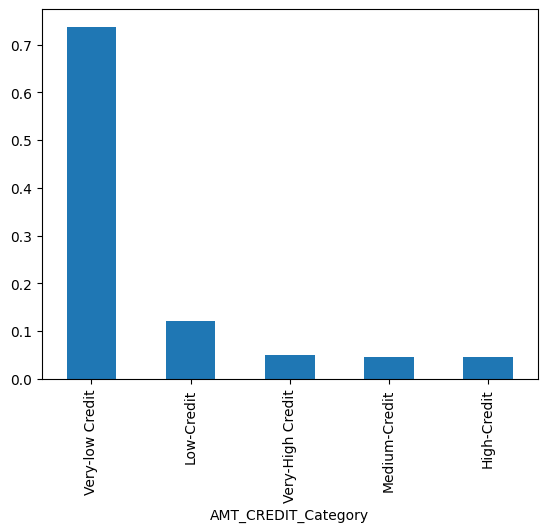

In [519]:
papp_df["AMT_CREDIT_Category"].value_counts(normalize =True).plot.bar()
plt.show()

- conclusion >> The Credit amount of the loan for most applicants is either low(200000 to 400000)

In [520]:
papp_df["AMT_GOODS_PRICE_Category"] = pd.qcut(papp_df.AMT_GOODS_PRICE,q = [0,0.25,0.45,0.65,0.85,1],labels = ["Very low Credit","Low-Credit","Medium-Credit","High-Credit","Ver-High Credit"])

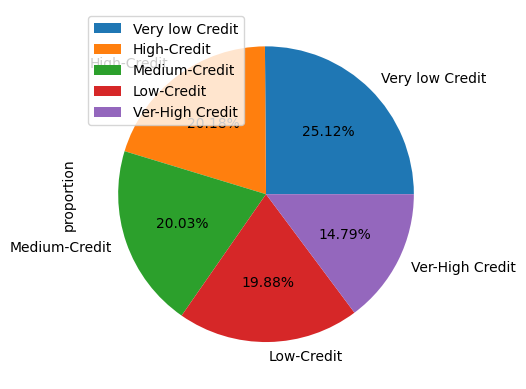

In [521]:
papp_df["AMT_GOODS_PRICE_Category"].value_counts(normalize =True).plot.pie(autopct= '%1.2f%%')
plt.legend()
plt.show()

## Data Imbalance Check
### Dividing Application Dataset with NAME_CONTRACT_STATUS

In [522]:
approved = papp_df[papp_df.NAME_CONTRACT_STATUS=="Approved"]
refused = papp_df[papp_df.NAME_CONTRACT_STATUS=="Refused"]
unused = papp_df[papp_df.NAME_CONTRACT_STATUS=="Unused offer"]
canceled = papp_df[papp_df.NAME_CONTRACT_STATUS=="Canceled"]

In [523]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize =True)*100

NAME_CONTRACT_STATUS
Approved        63.411619
Refused         18.541409
Canceled        15.822002
Unused offer     2.224969
Name: proportion, dtype: float64

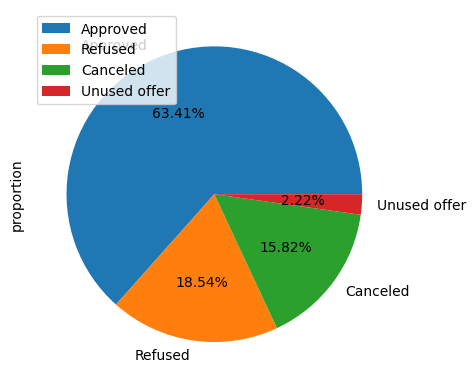

In [524]:
papp_df.NAME_CONTRACT_STATUS.value_counts(normalize =True).plot.pie(autopct= '%1.2f%%')
plt.legend()
plt.show()

- conclusion >> 63% of the Applicants have the loan approved ,15%,18% applicants are cancelled or rejected and 2% are unused

# Univariate Analysis

In [525]:
cat_cols = list(papp_df.columns[papp_df.dtypes == object])
num_cols = list(papp_df.columns[papp_df.dtypes == np.int64]) + list(papp_df.columns[papp_df.dtypes == np.float64])


In [526]:
cat_cols

['NAME_CONTRACT_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'FLAG_LAST_APPL_PER_CONTRACT',
 'NAME_CASH_LOAN_PURPOSE',
 'NAME_CONTRACT_STATUS',
 'NAME_PAYMENT_TYPE',
 'CODE_REJECT_REASON',
 'NAME_CLIENT_TYPE',
 'NAME_GOODS_CATEGORY',
 'NAME_PORTFOLIO',
 'NAME_PRODUCT_TYPE',
 'CHANNEL_TYPE',
 'NAME_SELLER_INDUSTRY',
 'NAME_YIELD_GROUP',
 'PRODUCT_COMBINATION']

In [527]:
num_cols

['SK_ID_PREV',
 'SK_ID_CURR',
 'HOUR_APPR_PROCESS_START',
 'NFLAG_LAST_APPL_IN_DAY',
 'DAYS_DECISION',
 'SELLERPLACE_AREA',
 'AMT_ANNUITY',
 'AMT_APPLICATION',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'CNT_PAYMENT',
 'DAYS_FIRST_DRAWING',
 'DAYS_FIRST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_LAST_DUE',
 'DAYS_TERMINATION',
 'NFLAG_INSURED_ON_APPROVAL']

In [528]:
cat_cols = ["NAME_CONTRACT_TYPE","WEEKDAY_APPR_PROCESS_START","NAME_CONTRACT_STATUS","NAME_PAYMENT_TYPE","NAME_CLIENT_TYPE","NAME_SELLER_INDUSTRY","NAME_YIELD_GROUP","PRODUCT_COMBINATION"]

In [529]:
num_cols=["HOUR_APPR_PROCESS_START","DAYS_DECISION","AMT_ANNUITY","AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE","CNT_PAYMENT"]

### Plot on Categorical columns

NAME_CONTRACT_TYPE
Consumer loans     52.781211
Cash loans         36.341162
Revolving loans    10.877627
Name: proportion, dtype: float64


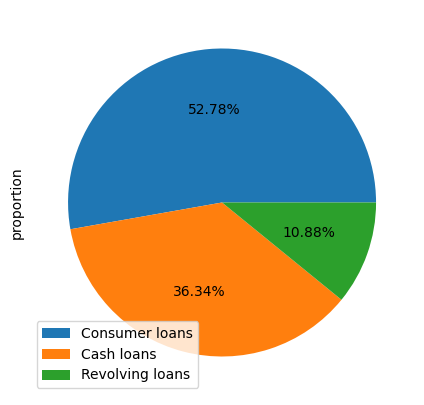

------------------
WEEKDAY_APPR_PROCESS_START
SATURDAY     16.192831
FRIDAY       15.822002
WEDNESDAY    15.574784
TUESDAY      15.080346
THURSDAY     14.833127
MONDAY       13.226205
SUNDAY        9.270705
Name: proportion, dtype: float64


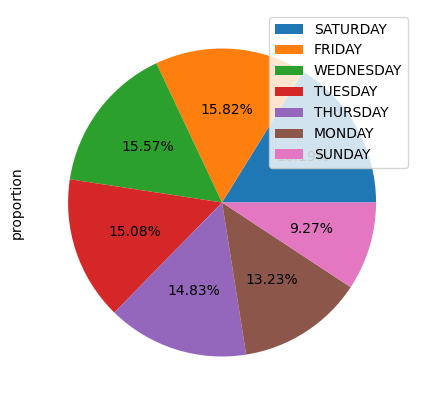

------------------
NAME_CONTRACT_STATUS
Approved        63.411619
Refused         18.541409
Canceled        15.822002
Unused offer     2.224969
Name: proportion, dtype: float64


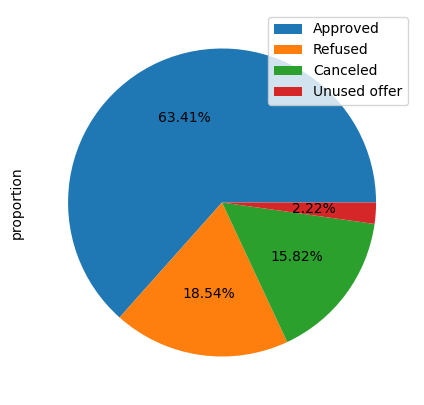

------------------
NAME_PAYMENT_TYPE
Cash through the bank                        62.669963
XNA                                          36.217553
Non-cash from your account                    0.988875
Cashless from the account of the employer     0.123609
Name: proportion, dtype: float64


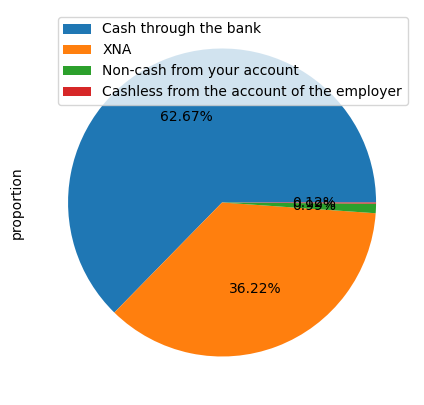

------------------
NAME_CLIENT_TYPE
Repeater     70.086527
New          21.508035
Refreshed     8.281829
XNA           0.123609
Name: proportion, dtype: float64


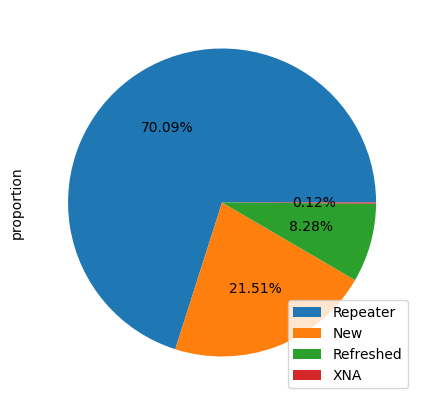

------------------
NAME_SELLER_INDUSTRY
XNA                     40.667491
Consumer electronics    26.576020
Connectivity            21.260816
Furniture                5.191595
Construction             3.584672
Industry                 1.112485
Clothing                 0.988875
Auto technology          0.370828
Jewelry                  0.247219
Name: proportion, dtype: float64


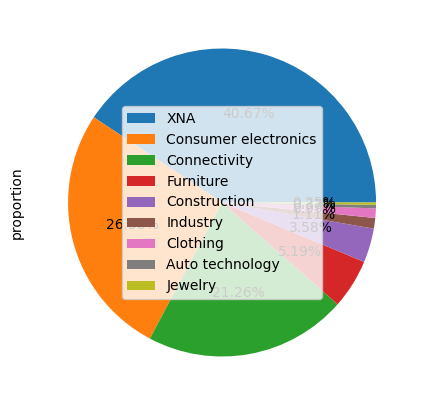

------------------
NAME_YIELD_GROUP
XNA           29.171817
high          22.373300
middle        22.249691
low_normal    21.013597
low_action     5.191595
Name: proportion, dtype: float64


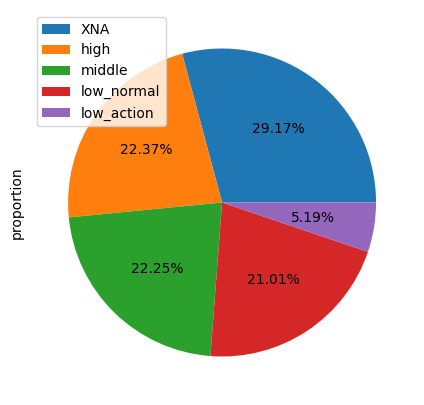

------------------
PRODUCT_COMBINATION
POS household with interest       17.552534
POS mobile with interest          15.698393
Cash                              15.203956
POS industry with interest         8.529048
Card Street                        6.180470
Cash X-Sell: low                   6.056860
Cash X-Sell: middle                5.933251
POS household without interest     5.315204
Card X-Sell                        4.697157
Cash Street: high                  3.708282
Cash X-Sell: high                  2.966625
POS mobile without interest        2.843016
POS other with interest            2.101360
Cash Street: middle                1.483313
Cash Street: low                   0.988875
POS industry without interest      0.741656
Name: proportion, dtype: float64


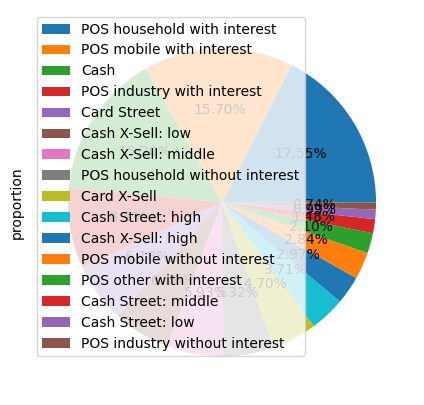

------------------


In [530]:
for col in cat_cols:
  print(papp_df[col].value_counts(normalize = True)*100)
  plt.figure(figsize=[5,5])
  papp_df[col].value_counts(normalize=True).plot.pie(labeldistance=None, autopct='%1.2f%%')
  plt.legend()
  plt.show()
  print('------------------')  

-Conclusion >>

1. NAME CONTRACT_TYPE-45% Applicants received Cash loans, 44% Applicants received Consumer loans, 12% received Revolving during previous

application

2. WEEKDAY APPR_PROCESS_START All the days have almost equal number of previous loan application

3. NAME CONTRACT_STATUS-62% of applications are approved, 19% Cancelled, 17% Retused and 2% unused 4 NAME PAYMENT_TYPE-62% of Payment type are Cash through bank25% Other modes

5. NAME CLIENT_TYPE-74% of Applicants are Repeaters, 18% are New applicants, 8% are Refreshed Appplicants

6 NAME SELLER_INDUSTRY-51% are from other Industnes, 24%, 17% are from Consumer electronics Connectivity Industry respectively

7. CHANNEL TYPE-43% Channel type is Crede and cash offices, 29% af country wide

8. NAME YIELD_GROUP-Majonty of the yield group are others

9. PRODUCT COMBINATION Most used PRODUCT COMBINATION is Cash followed by POS household with interest POS mobile with interest

## Plot on NUmerical Columns

99th Percentile 19.0
count    809.000000
mean      12.687268
std        3.235378
min        4.000000
25%       11.000000
50%       12.000000
75%       15.000000
max       22.000000
Name: HOUR_APPR_PROCESS_START, dtype: float64


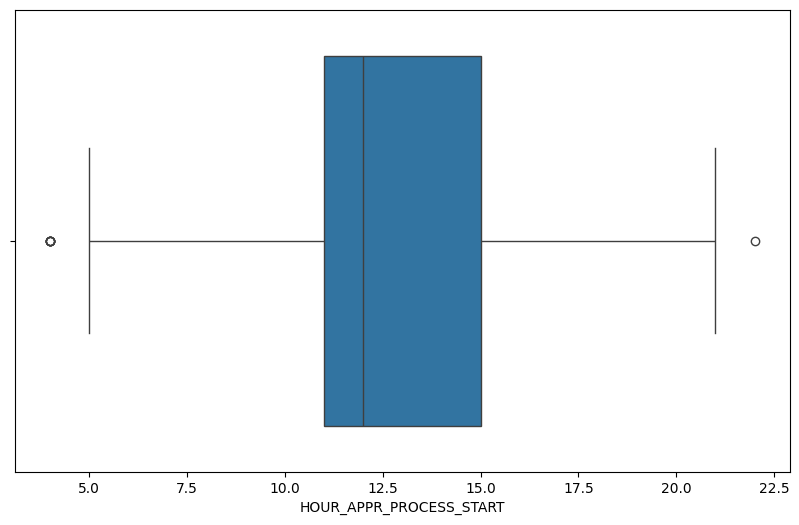

-----------------
99th Percentile 2863.4399999999996
count     809.000000
mean      878.949320
std       805.846023
min         4.000000
25%       273.000000
50%       559.000000
75%      1238.000000
max      2920.000000
Name: DAYS_DECISION, dtype: float64


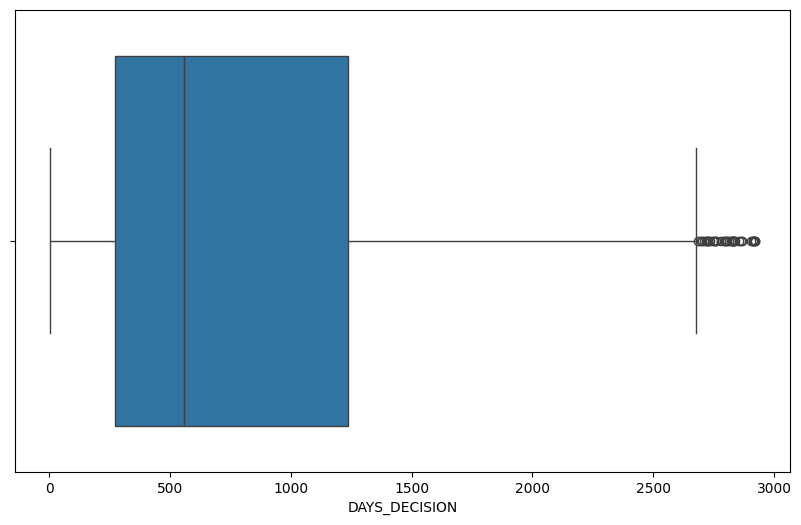

-----------------
99th Percentile nan
count      640.000000
mean     14843.642344
std      13589.279788
min       1097.640000
25%       6298.976250
50%      10043.707500
75%      18496.282500
max      83041.200000
Name: AMT_ANNUITY, dtype: float64


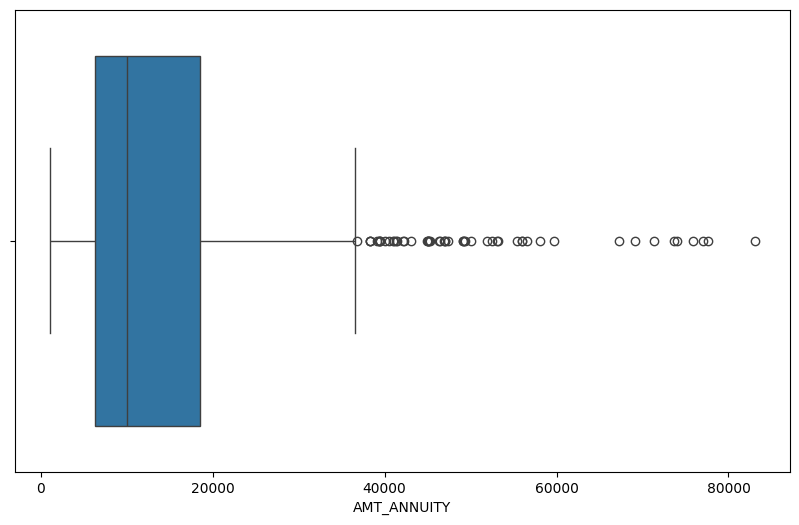

-----------------
99th Percentile 1191059.9999999993
count    8.090000e+02
mean     1.535574e+05
std      2.488279e+05
min      0.000000e+00
25%      2.646000e+04
50%      7.082550e+04
75%      1.575000e+05
max      2.025000e+06
Name: AMT_APPLICATION, dtype: float64


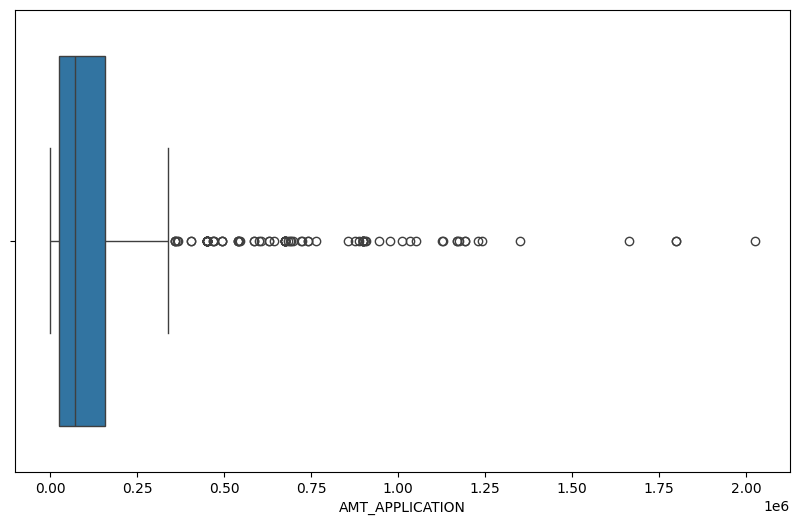

-----------------
99th Percentile 1330775.9999999998
count    8.090000e+02
mean     1.714404e+05
std      2.781548e+05
min      0.000000e+00
25%      2.866050e+04
50%      7.393500e+04
75%      1.782900e+05
max      2.241513e+06
Name: AMT_CREDIT, dtype: float64


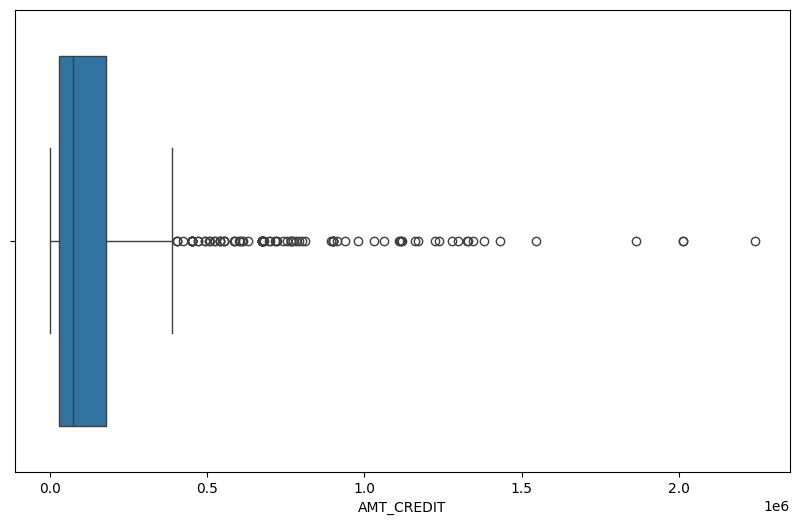

-----------------
99th Percentile nan
count    6.490000e+02
mean     1.914144e+05
std      2.644721e+05
min      0.000000e+00
25%      4.895100e+04
50%      9.445905e+04
75%      2.025000e+05
max      2.025000e+06
Name: AMT_GOODS_PRICE, dtype: float64


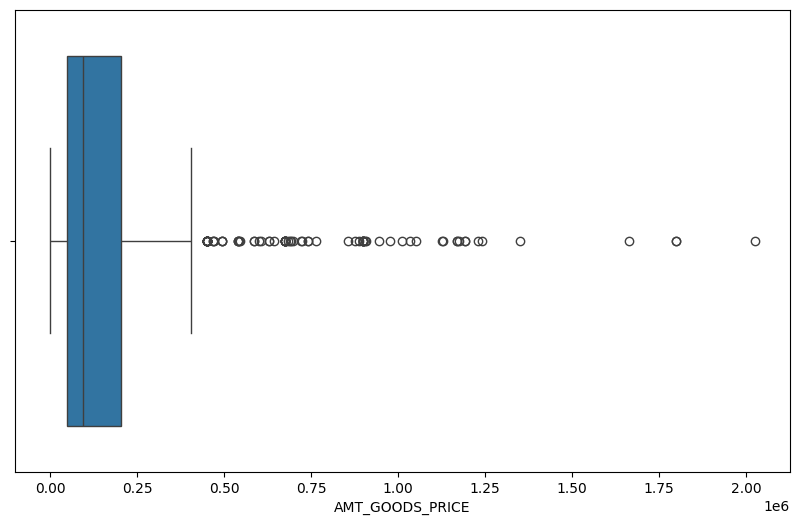

-----------------
99th Percentile nan
count    640.000000
mean      14.262500
std       12.550736
min        0.000000
25%        6.000000
50%       12.000000
75%       18.000000
max       60.000000
Name: CNT_PAYMENT, dtype: float64


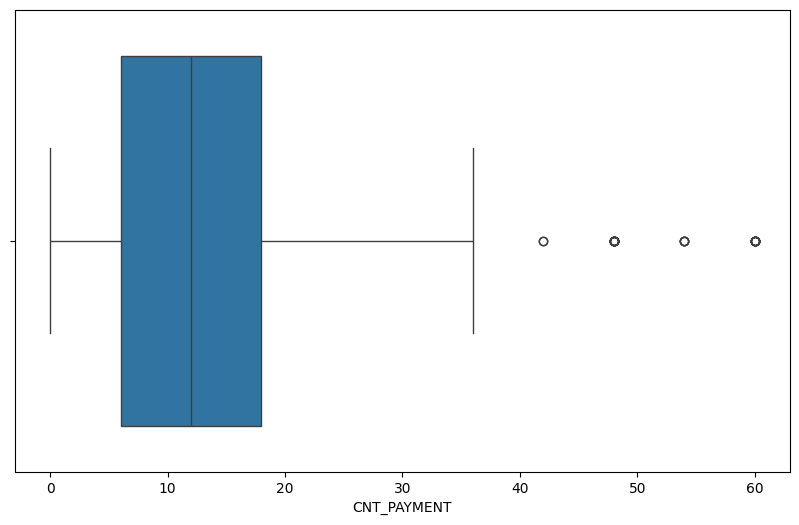

-----------------


In [531]:
for col in num_cols:
    print("99th Percentile",np.percentile(papp_df[col],99))
    print(papp_df[col].describe())
    plt.figure(figsize = [10,6])
    sns.boxplot(data=papp_df,x =col)
    plt.show()
    print("-----------------")

 - Conclusion >> Few Columns are with outliers are below

1 HOUR APPR PROCESS START has few outhers and there small differerice between mean and median

AMT CREDIT Column has a few outliers and there is a huge difference between the 99th percentile and the max value, also we could see huge variation en mean and median due to outflers

SAMT ANNUITY Column has a few outlers and there is a huge difference between the 99th percentile and the max value, also we could see significant vanation in mean and median due to outliers

AMT GOODS PRICE Column has a few outliers and there is a huge difference between the 59th percentille and the max value, abio we could see

significant variation in mean and median due to outlines

SAMT APPLICATION Column has a few outters and there is a huge difference between the 99th percentile and the max value, atso we could see tuge vanation in mean and median due to outler

6 CNT PAYMENT Couron has tew outliers and thefe small difference between mean and median 7 DAYS DECISION has tew outliers and there small difference between mean ang median

# Bivariate and Multivariate Analysis

### Bivariate Analysis between WEEKDAY_APPR_PROCESS_START vs AMT_APPLICATION

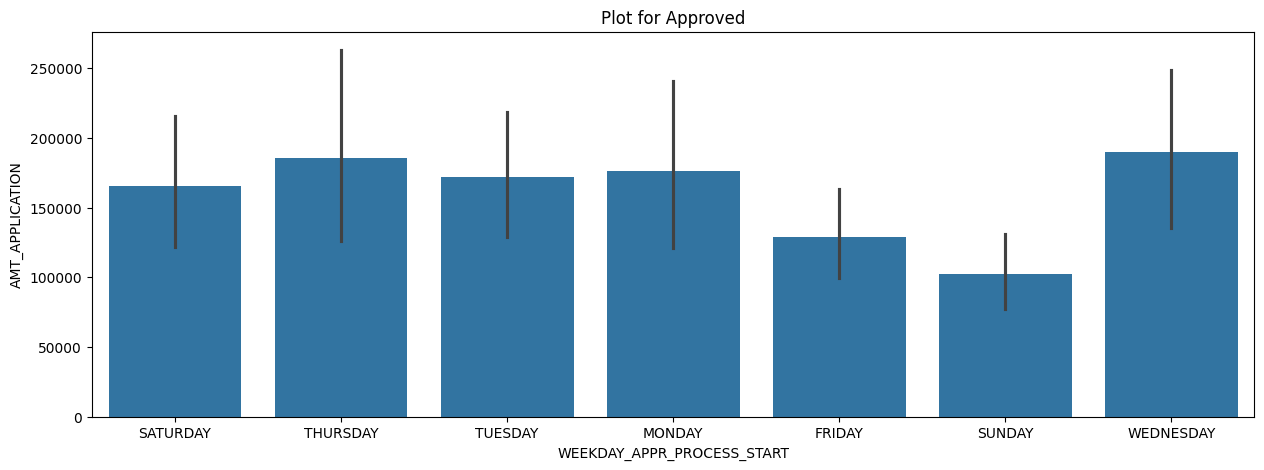

In [532]:
plt.figure(figsize=[15,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y = 'AMT_APPLICATION',data=approved)
plt.title("Plot for Approved")
plt.show()

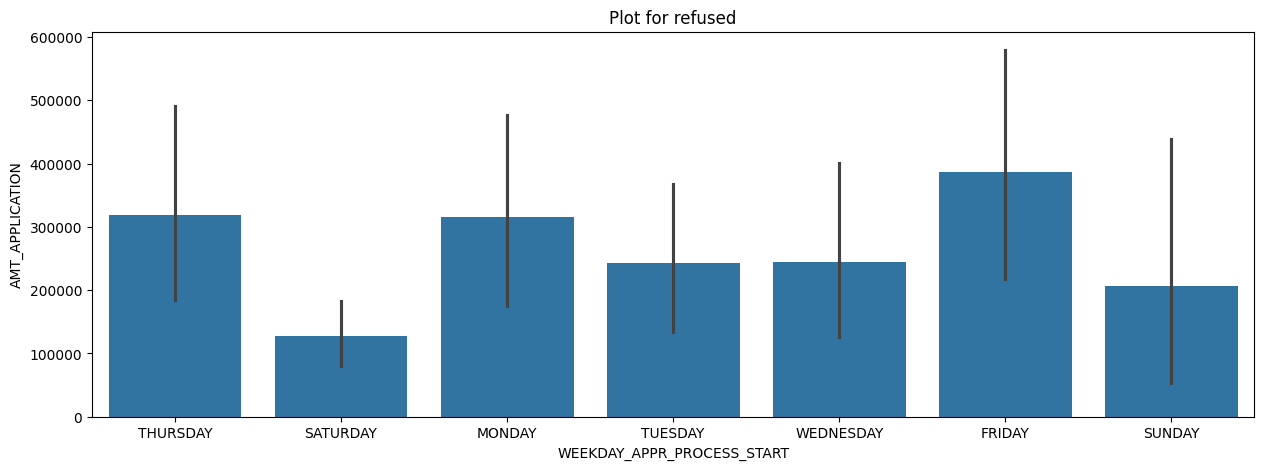

In [533]:
plt.figure(figsize=[15,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y = 'AMT_APPLICATION',data=refused)
plt.title("Plot for refused")
plt.show()

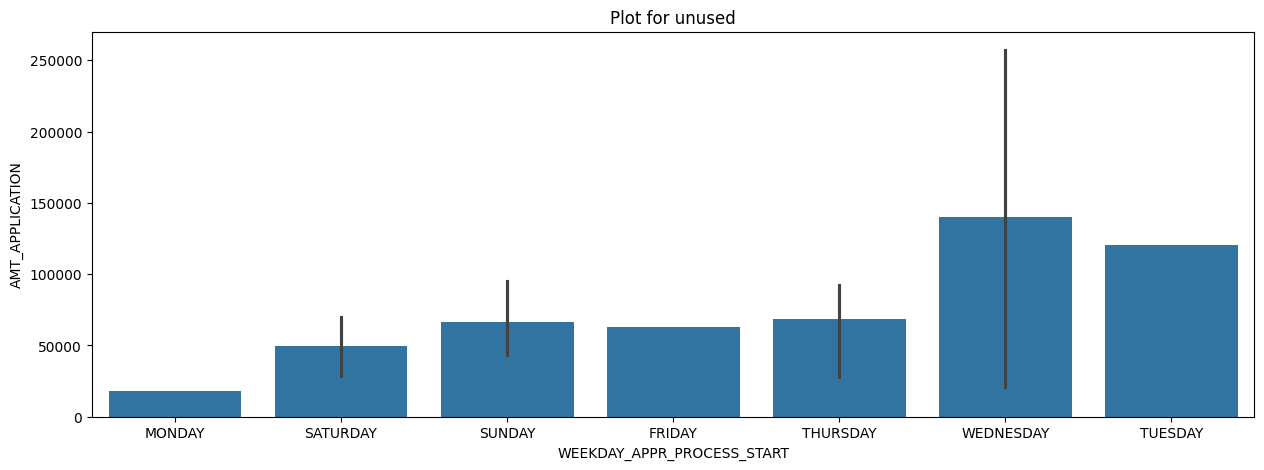

In [534]:
plt.figure(figsize=[15,5])
sns.barplot(x='WEEKDAY_APPR_PROCESS_START',y = 'AMT_APPLICATION',data=unused)
plt.title("Plot for unused")
plt.show()


-Conclusion >>

1. The Credit Amount of applicants with approved status is high on Monday and Wednesday than other days, and least on Sunday

2. The Credit Amount of applicants with cancelled status is high on Sunday and almost equal on other days 3. The Credit Amount of applicants with rejected status is least on Sunday and more on Monday and Wednesday

4. The Credit Amount of applicants with unused offer Status is almost equal on all days


### Bivarient Analysis between AMT ANNUITY VS AMT_GOODS_PRICE


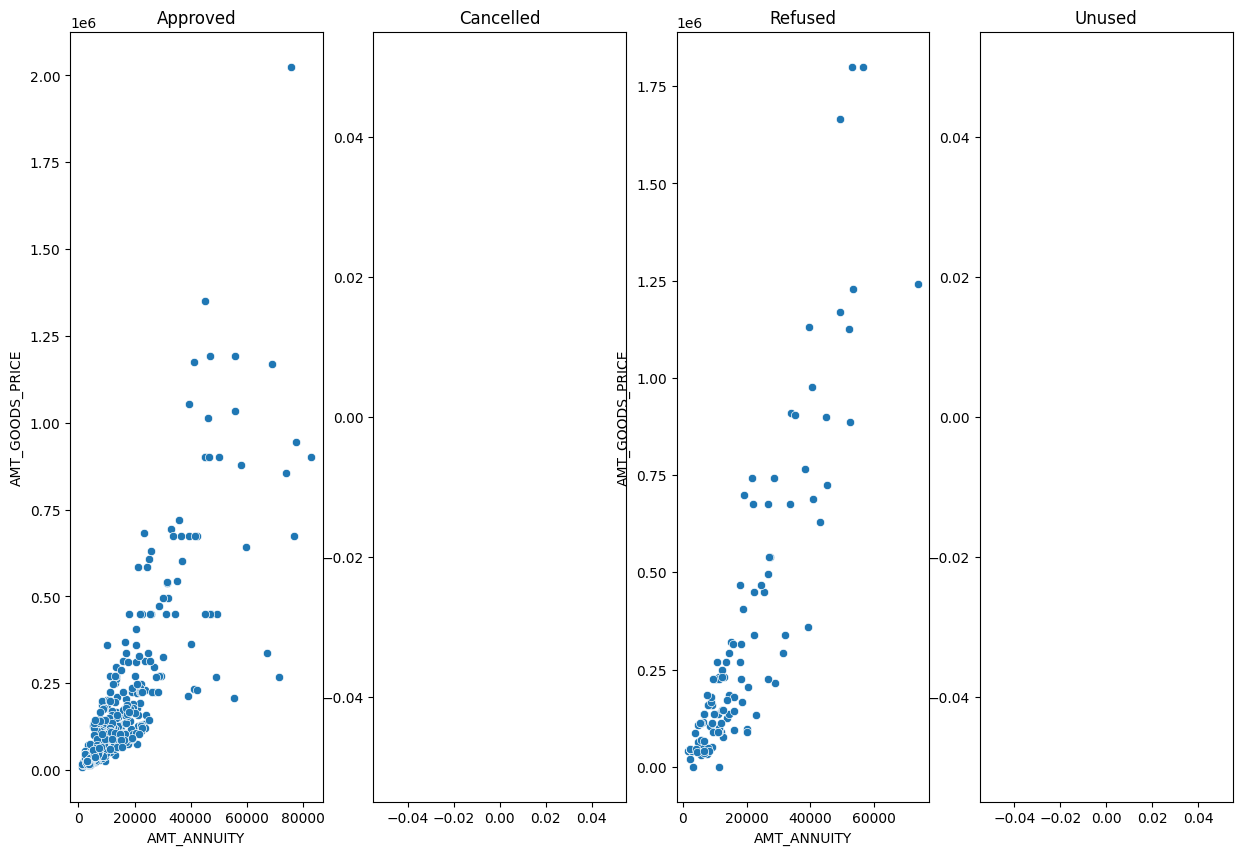

In [535]:
plt.figure(figsize=(15,10))
plt.subplot(1,4,1)
plt.title("Approved")
sns.scatterplot(x='AMT_ANNUITY',y ='AMT_GOODS_PRICE', data=approved)
plt.subplot(1,4,2)
plt.title("Cancelled")
sns.scatterplot(x='AMT_ANNUITY',y ='AMT_GOODS_PRICE', data=cancelled)
plt.subplot(1,4,3)
plt.title("Refused")
sns.scatterplot(x='AMT_ANNUITY',y ='AMT_GOODS_PRICE', data=refused)
plt.subplot(1,4,4)
plt.title("Unused")
sns.scatterplot(x='AMT_ANNUITY',y ='AMT_GOODS_PRICE', data=unused)
plt.show()


- Conclusion>

1. For loan status as Approved Refused Cancelled Amount of annuity increases with goods price

2. For loan status as Refused it has no linear relationship

## Co-relation between Numerical Columns


In [536]:
corr_approved= approved [["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]]
corr_refused= refused [["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]] 
corr_cancelled= cancelled [["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]] 
corr_unused =unused [["DAYS_DECISION", "AMT_ANNUITY", "AMT_APPLICATION", "AMT_CREDIT", "AMT_GOODS_PRICE", "CNT_PAYMENT"]]


### Co-relation for Numerical columns for Approved


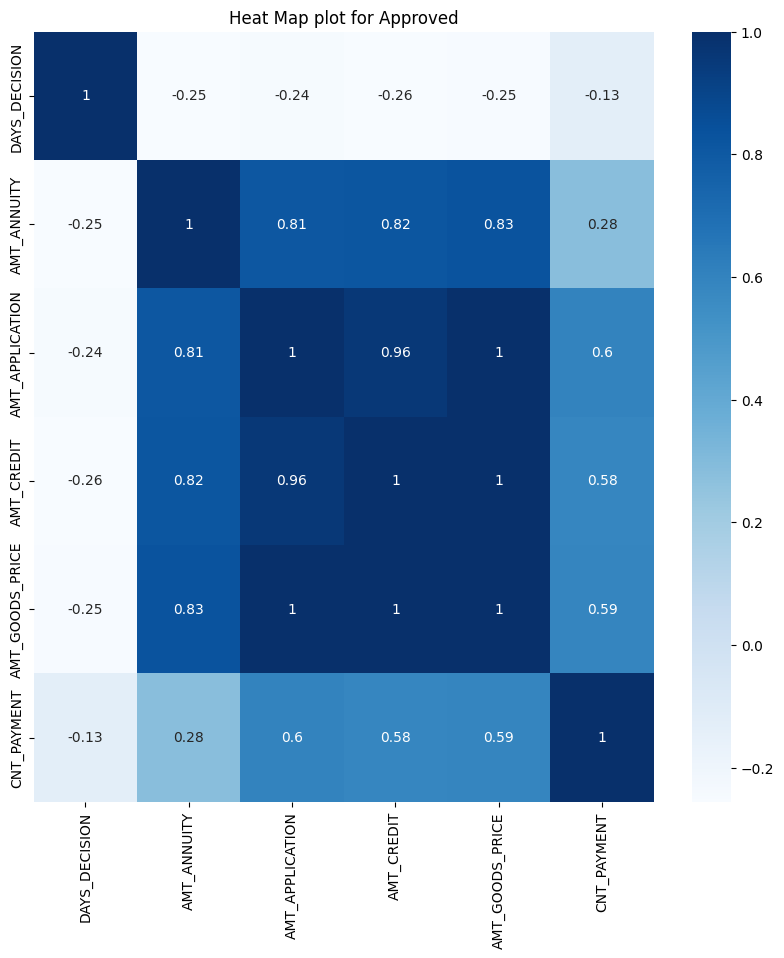

In [537]:
plt.figure(figsize=[10,10]) 
sns.heatmap(corr_approved.corr(),annot=True, cmap="Blues") 
plt.title("Heat Map plot for Approved")

plt.show()

- Conclusion >>

1. AMT_APPLICATION has higher Corelation with AMT_CREDIT and AMT_GOODS_PRICE AMT_ANNUITY

2. DAYS DECISION has negative Corelation with AMT_GOODS_PRICE AMT_CREDIT, AMT_APPLICATION.CNT_PAYMENT AMT_ANNUITY


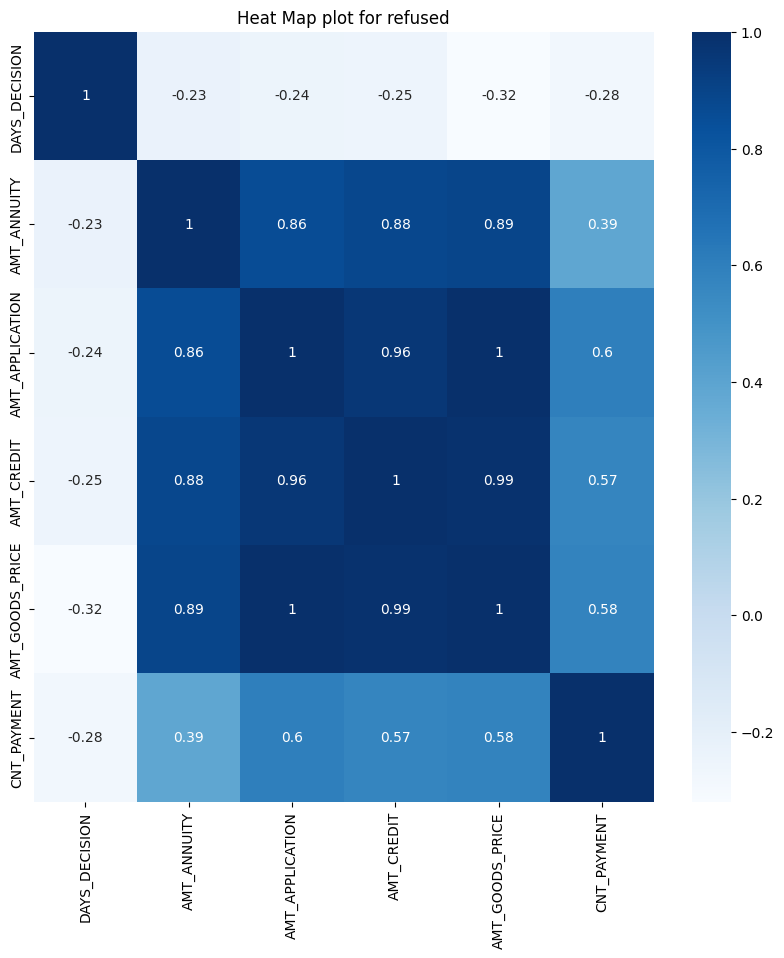

In [538]:
plt.figure(figsize=[10,10]) 
sns.heatmap(corr_refused.corr(),annot=True, cmap="Blues") 
plt.title("Heat Map plot for refused")

plt.show()

- Conclusion >> For Refused Category

1. AMT_APPLICATION has higher Corelation with AMT_CREDIT and AMT_GOODS_PRICE AMT_ANNUITY

2 DAYS DECISION has negative Corelation with AMT_GOODS_PRICE AMT_CREDIT, AMT_APPLICATION.CNT_PAYMENT AMT_ANNUITY



### Co-relation for Numerical columns for Cancelled


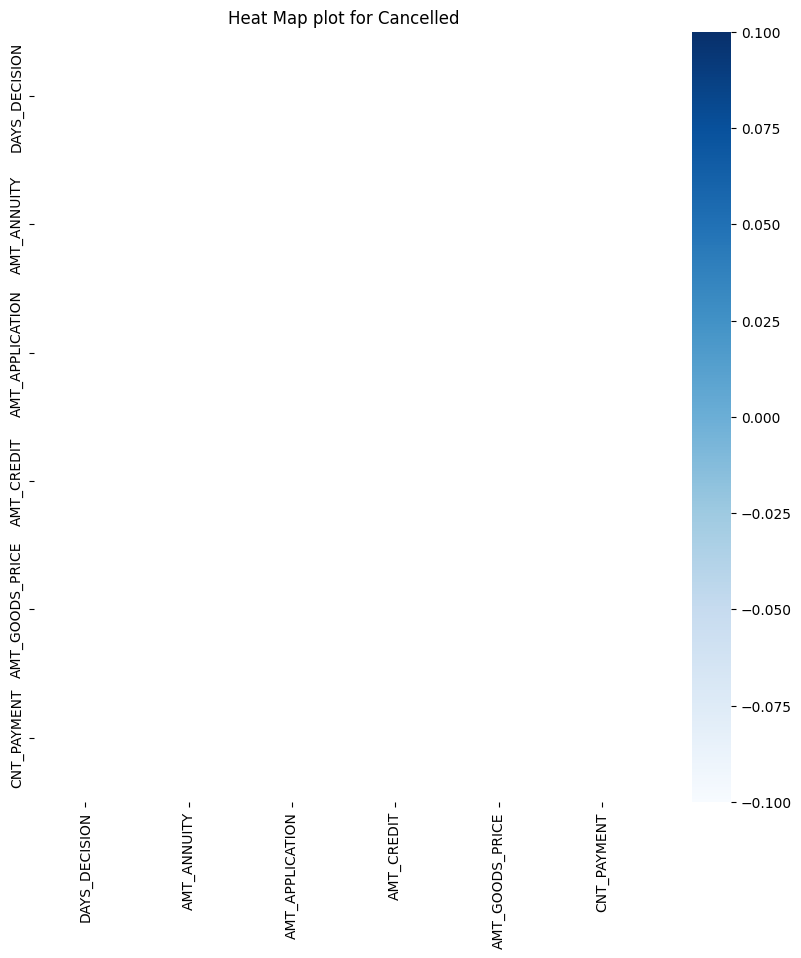

In [539]:
plt.figure(figsize=[10,10]) 
sns.heatmap(corr_cancelled.corr(),annot=True, cmap="Blues") 
plt.title("Heat Map plot for Cancelled")

plt.show()

- Conclusion >> For Cancelled Category

1. AMT_APPLICATION has higher Corelation with AMT_CREDIT ar

GOODS PRICE

2. DAYS DECISION has positive Corelation with AMT_GOODS PRICAMT_CREDIT AMT_APPLICATION


### Co-relation for Numerical columns for Unused


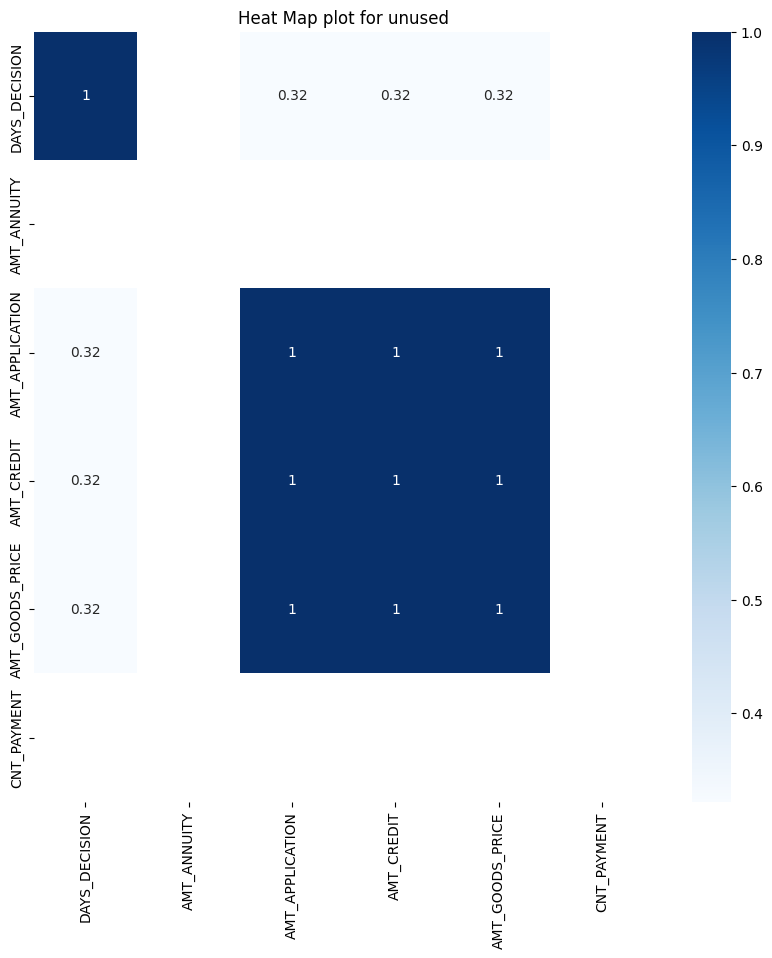

In [540]:
plt.figure(figsize=[10,10]) 
sns.heatmap(corr_unused.corr(),annot=True, cmap="Blues") 
plt.title("Heat Map plot for unused")

plt.show()

- Conclusion >> For Unused Category

1. AMT_APPLICATION has higher Corelation with AMT_CREDIT and AMT_GOODS_PRICE

2 DAYS DECISION and CNT_PAYMENT has negative Corelation with AMT_GOODS_PRICE AMT_CREDIT, AMT_APPLICATION


### Merge the Application and Previous Application DataFrames


In [541]:
merge_df = app_df.merge(papp_df, on=[ "SK_ID_CURR"], how= 'left') 
merge_df.head()


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE_x,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT_x,AMT_ANNUITY_x,AMT_GOODS_PRICE_x,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START_x,HOUR_APPR_PROCESS_START_x,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,YEARS_BIRTH,YEARS_EMPLOYED,YEARS_REGISTRATION,YEARS_ID_PUBLISH,YEARS_LAST_PHONE_CHANGE,AMT_CREDIT_Category_x,AGE_Category,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,AMT_CREDIT_Category_y,AMT_GOODS_PRICE_Category
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,9461,637,3648.0,2120,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.262949,0.139376,2.0,2.0,2.0,2.0,1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,26,1,10,5,3,Medium Credit,25 - 45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,16765,1188,1186.0,291,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.622246,0.524496,1.0,0.0,1.0,0.0,828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,47,3,3,0,2,NaN,45 - 65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,19046,225,4260.0,2531,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,0.555912,0.729567,0.0,0.0,0.0,0.0,815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,53,0,11,7,2,Very low Credit,45 - 65,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,19005,3039,9833.0,2437,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,Business Entity Type 3,0.650442,0.524496,2.0,0.0,2.0,0.0,617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.

In [542]:
merge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 358 entries, 0 to 357
Columns: 113 entries, SK_ID_CURR to AMT_GOODS_PRICE_Category
dtypes: category(4), float64(36), int64(46), object(27)
memory usage: 307.2+ KB


### Filtering required columns for our Analysis


In [543]:
for col in merge_df.columns:
    if col.startswith("FLAG"):
       merge_df.drop(columns=col, axis=1, inplace=True)


In [544]:
merge_df.shape

(358, 84)

In [545]:
res1 = pd.pivot_table(data=merge_df, index=["NAME_INCOME_TYPE", "NAME_CLIENT_TYPE"], columns=["NAME_CONTRACT_STATUS"], 
                      values="TARGET", aggfunc="mean")
res1

,NAME_CONTRACT_STATUS,Approved,Refused
NAME_INCOME_TYPE,NAME_CLIENT_TYPE,,
Commercial associate,Repeater,NaN,0.0
State servant,New,0.0,NaN


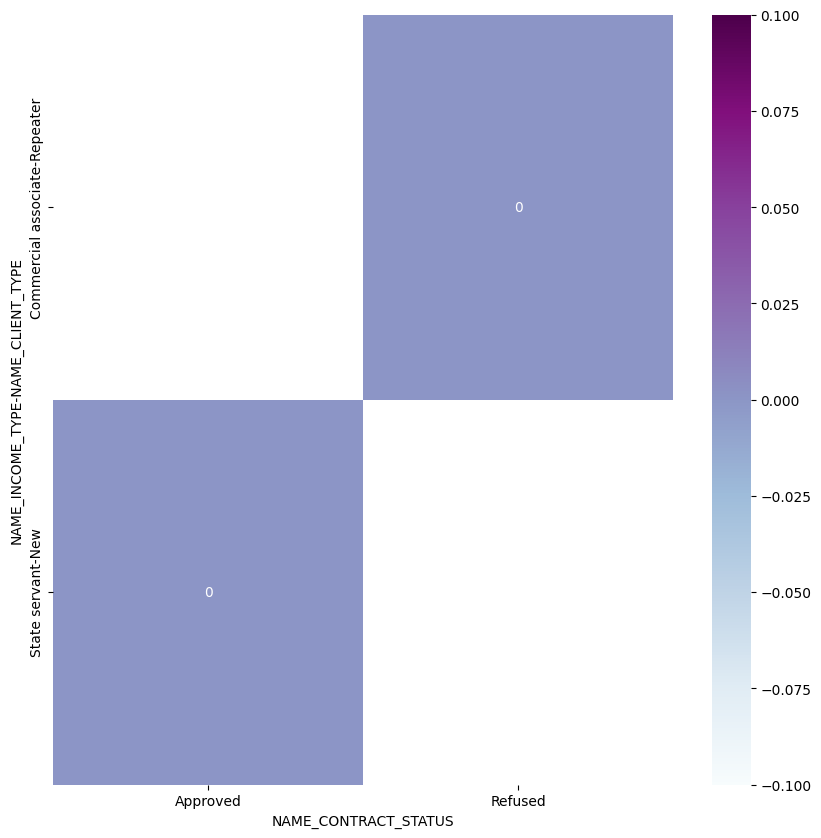

In [546]:
plt.figure(figsize=[10,10]) 
sns.heatmap(res1, annot=True, cmap="BuPu") 
plt.show()


In [547]:
res2 = pd.pivot_table(data=merge_df, index=["CODE_GENDER", "NAME_SELLER_INDUSTRY"], 
                      columns=["TARGET"], values= "AMT_GOODS_PRICE_x", aggfunc='sum')
res2

,TARGET,0
CODE_GENDER,NAME_SELLER_INDUSTRY,
F,Industry,810000.0
M,XNA,900000.0


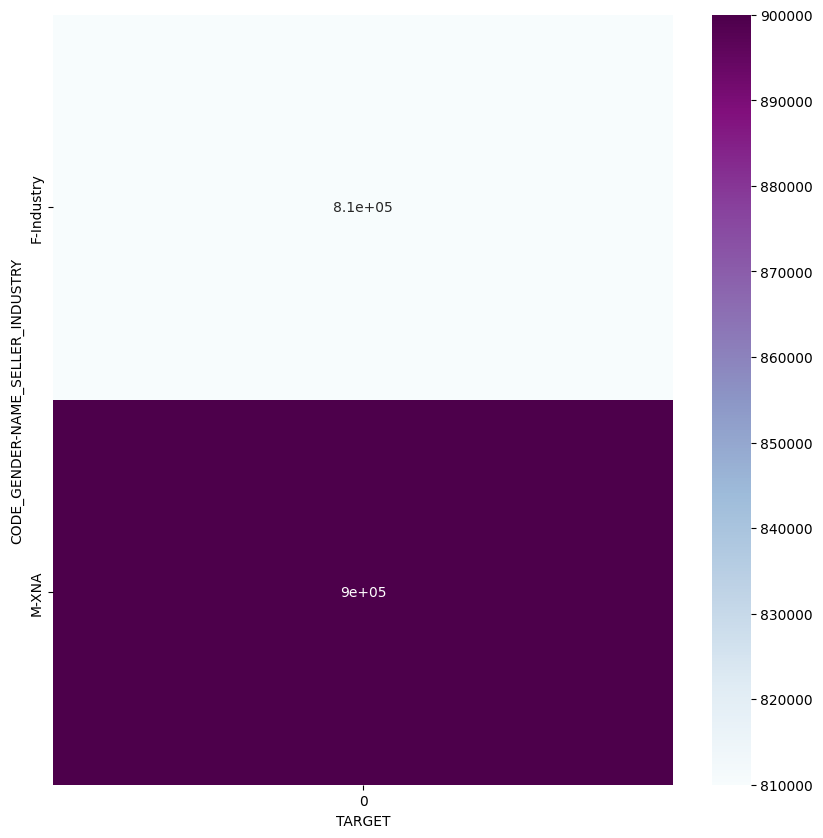

In [548]:
plt.figure(figsize=[10,10]) 
sns.heatmap(res2, annot=True, cmap="BuPu") 
plt.show()
